# OBLIGATORIO DE ML 2
* 42987844 - Carlos Piriz

---
# Entendimiento del negocio (Business Understanding)
---

## Contexto
En base a los crecientes casos de personas que sufren ataques al corazon, el Hospital de Clínicas pretende llevar a cabo un trabajo que permita identificar de manera preventiva y con la mayor antelacion posible, probables casos de personas predispuestas a sufrir dichos ataques.
De esta manera, se puede hacer un seguimiento de estos pacientes y una mejor prevencion. Redundando esto en, mejor calidad de servicio, mayor proteccion de la vida de los pacientes, probable ahorro en tratamientos y procedimientos de emergencia ocasionados por el tratamiento de los pacientes que sufren ataques. Permitiendo una mejor planificacion y uso, tanto de personal, como de instrumental y recursos con los que cuenta el hospital.

### Motivacion
Es en el contexto de lo explicado anteriormente, es que, surge la motivacion de crear una forma rapida, generalizable, rentable y confiable de lograr determinar los pacientes a cuales diferenciar en su tratamiento, con la identificacion temprana.


## Alcance
En base a este contexto y motivacion, es que se plantea la realizacion de una proceso que permita identificar de manera asertiva y rapida la predisposicion a los ataques cardiacos.  En este sentido, como primera instancia se plantea la realizacion de un modelo de datos para poder predecir o clasificar rapidamente, en base a algunos datos de entrada, la predisposicion a un ataque para un paciente dado.
Este proceso, en esta instancia, implica:
* La generacion de un modelo correcto y conveniente. Que permita resolver o responder, qué personas son propensas o tienen mayor probabilidad a tener un ataque cardiaco.
* La puesta a disposicion del modelo para su uso por parte del personal del hospital. Identificando alguna manera de aplicacion viable.
Cabe aclarar, que un buen metodo propio, podria favorecer a toda la salud en general, brindando metodos generales o centralizados para poder replicar el modelo para otras organizaciones de la salud, por ejemplo.
Independientemente de esto, entendemos que cualquier mejora o logro con este alcance, redundara en una mejor atencion de la salud en general, con un impacto positivo en todos los sentidos.


## Criterios de exito
Si bien, en base al contexto, se pretende lograr segun este proceso, mejora en la atencion, prevencion, gestion de los recursos, etc. Implicando esto, mejoras en la gestion de la atencion al paciente, concretamente para este alcance deseado, se tomaran como criterios de exito:
* Que se logre realizar un modelo adecuado, validando segun las metricas correspondientes.
* Que el modelo pueda generalizar adecuadamente con datos no conocidos.
* Establecer un criterio de aceptacion de eficacia del modelo.
    * En cuanto a este criterio de aceptacion de exito, dependera, pero en general se toma que un 80% de aciertos parece razonable.

## Viabilidad
Para la realizacion de este proyecto, entendemos necesaria la disponibilidad de datos, asi como del equipamiento necesario para la realizacion de las tareas necesarias.
En base a estos requerimientos, se plantean ciertas cuestiones que suponen algun riesgo.
### Riesgos
* Falta de datos para el analisis y la generacion del modelo: Esto es, que no se disponga de los datos necesarios ya sea en calidad como en cantidad. Para mitigar o solventar este riesgo, si no es posible obtener los datos necesarios de los pacientes propios, se recurrira a un conjunto de datos equivalentes( o que pudieran servir al proposito).
* Falta de equipamiento necesario: Esto se refiere tanto al equipamiento para la obtencion de los datos, como tambien para su procesamiento y generacion de modelo resultante. En este sentido, suponemos que los datos ya fueron tomados, necesitariamos equipamiento de computos para el procesamiento. Esto se puede obtener de recursos propios, asi como tambien usando plataformas online pagas por ejemplo.  
### Soluciones existentes
* Si bien, existen generaciones de modelos como el que se plantea realizar, la finalidad del proceso implica, tener metodos y procesos propios que puedan servir como insumo para los fines mas generales y que a su vez estos  metodos y procesos puedan ser controlados y corregidos segun necesidades. Por tal razon, se justifica este proyecto.

## Entregables e hitos
### Entregables
Se pretende dividir el proceso de la generacion del modelo en los siguientes pasos:
* Entregable 1: Obtencion de los datos.
* Entregable 2: Analisis de los datos.
* Entregable 3: Limpieza y preparacion de los datos.
* Entregable 4: Generacion del modelo adecuado.
* Entregable 5: Disponibilidad del modelo para su uso.
### Plazos
En cuanto a los plazos, se plantea el siguiente cronograma segun la secuencia de los entregables:
* Entregable 1: 3 dias
* Entregable 2: 5 dias
* Entregable 3: 10 dias
* Entregable 4: 4 dias
* Entregable 5: 4 dias
* Margen: 2 dias.
### Metodologias
En cuanto a las metodologias a utilizar, seran las metodologias correspondientes y necesarias, como:
* Obtencion y/o extraccion de datos.
* Normalizacion y homogenizacion de los datos.
* Limpieza y analisis de los datos.
* Limpieza y preparacion de los datos.
* Analisis y generacion de un modelo que cumpla las espectativas.
* Secuenciacion de tareas para poder generar procesos reproducibles.





    
    

In [1]:
############################################################################################################################################################
# IMPORTACIONES 
############################################################################################################################################################
#Sistema
import warnings
import os
#DB
from sqlalchemy import create_engine, text

import logging
logging.basicConfig()
logging.disable(logging.INFO)
logging.getLogger('sqlalchemy').setLevel(logging.ERROR)

#Datos, procesamiento
import pandas as pd
import numpy as np

#Fechas
import datetime as dt
from datetime import datetime, date, time, timedelta
import calendar

#Visualizacion
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
import plotly.io as pio
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash
from dash import dcc
from dash import html
from dash import ctx,callback
from dash.dependencies import Input, Output, State
stylesheet = [dbc.themes.BOOTSTRAP]

# Otras importaciones
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency

#PDF
#rom weasyprint import HTML, CSS
#from weasyprint.text.fonts import FontConfiguration

#Requests
import requests as req


# Para configuraciones locales
import locale
#locale.setlocale(locale.LC_ALL, '')
#locale._override_localeconv["thousands_sep"] = "."
#locale._override_localeconv["decimal_point"] = ","
#print (locale.atof('123.456,78'))
#print(locale.currency(12345.67))

warnings.filterwarnings("ignore")

---
# Entendimiento de los datos (Data Understanding)
---
## Dataset
### Origen
Para este primer acercamiento se utilizara el dataset, obtenido desde:
* https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### Columnas - Nombres y significado
Las columnas iniciales del dataset son:

* age : Edad del paciente
* sex : Sexo del paciente
	* Valor 0: Femenino
	* Valor 1: Masculino
* cp : Tipo de dolor en el pecho
    *  Valor 1: Angina tipica
	*  Valor 2: Angina atipica
	*  Valor 3: Dolor no anginal
	*  Value 0: Asintomatico
* trtbps : Presion arterial en reposo (in mm Hg)
* chol : Colesterol(colestoral) en mg/dl obtenido a través del sensor de IMC
* fbs : Azucar en la sangre en ayunas > 120 mg/dl
	* 1 = Verdadero
	* 0 = Falso
* restecg : Resultados electrocardiograficos en reposo.
	* Valor 0: Normal
	* Valor 1: Teniendo anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)
	* Valor 2: Mostrando hipertrofia ventricular izquierda probable o definitiva según los criterios Valorthalach de Estes: frecuencia cardíaca máxima valor alcanzado
* thalachh : Frecuencia cardíaca máxima alcanzada
* exng: Angina inducida por el ejercicio 
	* 1 = Si
	* 0 = No
* oldpeak: Pico anterior
* slp: Pendiente (Medida del cambio en el segmento ST en relación con el aumento de la frecuencia cardíaca durante el ejercicio)
* caa: Número de vasos importantes Aorta,vena pulmonar, vena cava, tronco pulmonar)
* thall: El estado del corazón obtenido de la prueba de talio 
	1: Normal,
	2: Defecto fijo
	3: Defecto reversible
	0: No detectado
* target : 
	* 0= Menos posibilidades de sufrir un ataque cardíaco
	* 1= Mayores posibilidades de sufrir u**n ataque cardíaco


### Carga del dataset y vistazo general

In [2]:
# Carga del archivo
df_heart = pd.read_csv('./datos/heart.csv')

In [3]:
# Verificacion de las columnas
df_heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
# Columnas y sus tipos de datos
df_heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
# Verificacion de la carga
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Otra verificacion de la carga
df_heart.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1


In [7]:
# Cantidades, dimensiones
df_heart.shape

(303, 14)

## Analisis de los datos

### Analisis de valores importantes de los datos

In [8]:
# Valores estadisticos generales
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Informacion de las columas
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Duplicados

In [10]:
# Verificacion de duplicados
df_heart.duplicated(keep='first').unique()

array([False,  True])

In [11]:
# Verificacion de duplicados
print(df_heart.duplicated().sum())

1


In [12]:
# listar duplicados
df_heart.loc[df_heart.duplicated(keep='first')]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
# Verificacion de duplicados
df_heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [14]:
df_heart.loc[(df_heart['age']==38) & (df_heart['trtbps']==138)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Valores nulos

In [15]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [16]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Verificacion de valores por columnas

In [17]:
for c in df_heart:
    print("** Columna: "+ c+ " **")
    print(df_heart[c].unique())
    print("--------------------------------------------")
    print(df_heart[c].nunique())
    print()

** Columna: age **
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------------------------------
41

** Columna: sex **
[1 0]
--------------------------------------------
2

** Columna: cp **
[3 2 1 0]
--------------------------------------------
4

** Columna: trtbps **
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------------------------------
49

** Columna: chol **
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 

In [18]:
# Renombramos las columnas
df_heart.columns = ['edad','sexo','tipo_dolor','presion_arterial_reposo','colesterol','azucar_en_sangre','res_electrocardiograficos','frec_cardiaca_max','angina_ind_ejercicio','pico_anterior','pend_frec_ejercicio','num_vasos','estado_corazon','propenso']

In [19]:
#Verificamos columnas
df_heart.sample()

,edad,sexo,tipo_dolor,presion_arterial_reposo,colesterol,azucar_en_sangre,res_electrocardiograficos,frec_cardiaca_max,angina_ind_ejercicio,pico_anterior,pend_frec_ejercicio,num_vasos,estado_corazon,propenso
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


### EDA

##### Verificamos las correlaciones con la matriz

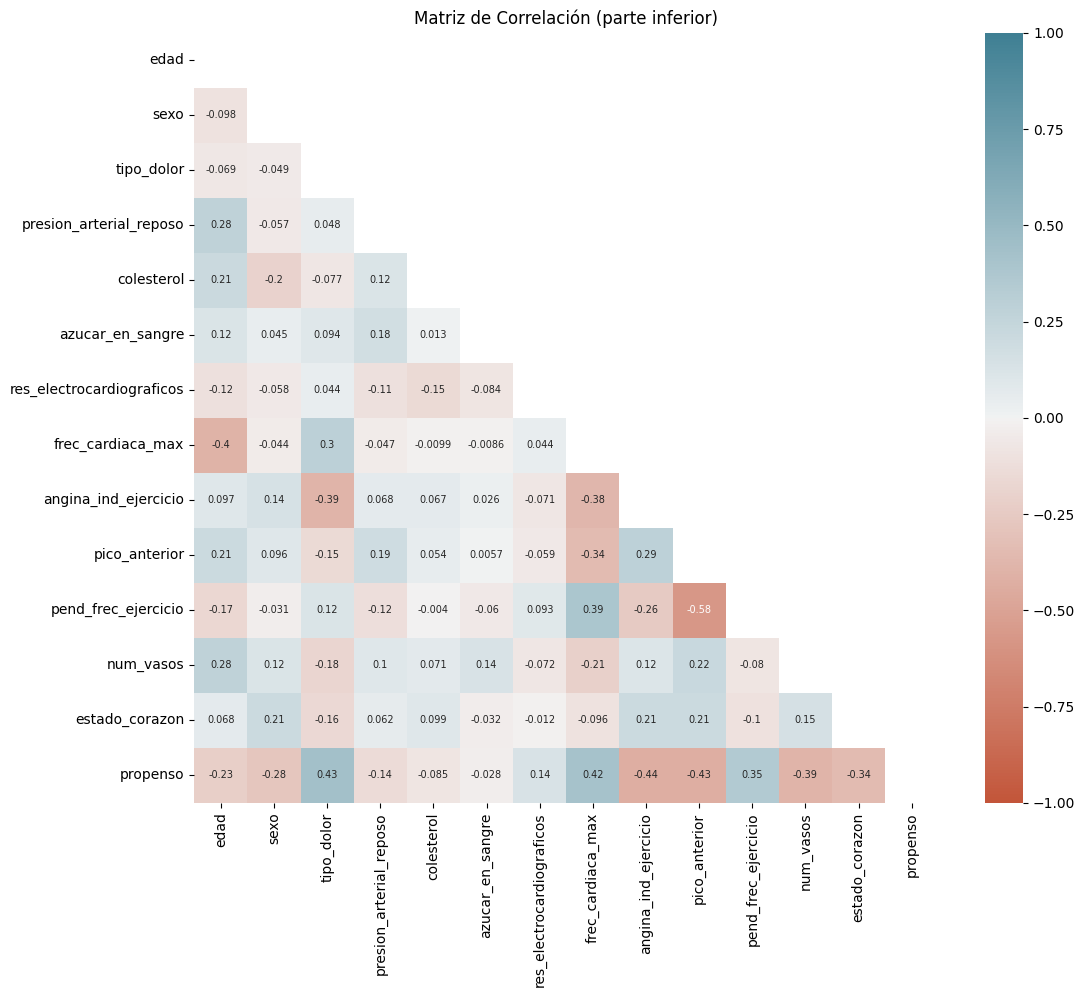

In [20]:
# Calculamos la matris de correlacion
corrmat = df_heart.corr()
# Establecer la mascara para mostrar segun indices
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

# Establecer el tamaño del grafico
plt.figure(figsize=(12, 10))

# Crear el heatmap con Seaborn, ajustando la paleta de colores
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

# Mostrar el gráfico
plt.title('Matriz de Correlación (parte inferior)')
plt.show()

#### Observacion 1
La matriz de correlaciones:
* Muestra correlaciones debiles en general. No existiendo alguna correlacion fuerte presente
* Dentro de las correlaciones mas fuertes destacamos:
    * Positivas:
        * Tipo de dolor - Propenso
        * Frecuencia cardiaca maxima - Propenso
        * Pendiente de frecuencia de ejercicio - Frecuencia cardiaca maxima
        * Pendiente de frecuencia de ejercicio - Propenso
    * Negativas:
        * Pendiente de frecuencia de ejercicio - Pico anterior
        * Dolor inducido por ejercicio - Propenso
        * Pico anterior - Propenso
        * Numero de vasos - Propenso

Estas correlaciones destacadas parecerian coherentes ya que:
* Pudieran haber dolores caracteristicos que pudieran ayudar a caracterizar de alguna manera esa propension.
* Pareceria tener sentido que la frecuencia cardiaca maxima, pudiera tener injerencia en si es propenso o no.
* Que los valores de pendiente de frecuencia de ejercicio, puede dar informacion sobre esa propension.
* Por lo mismo, tendria sentido que exista algun nivel de correlacion entre el Pico anterior y Numero de vasos con la columna de Propenso.

##### Verificamos las distribuciones de a pares de variables

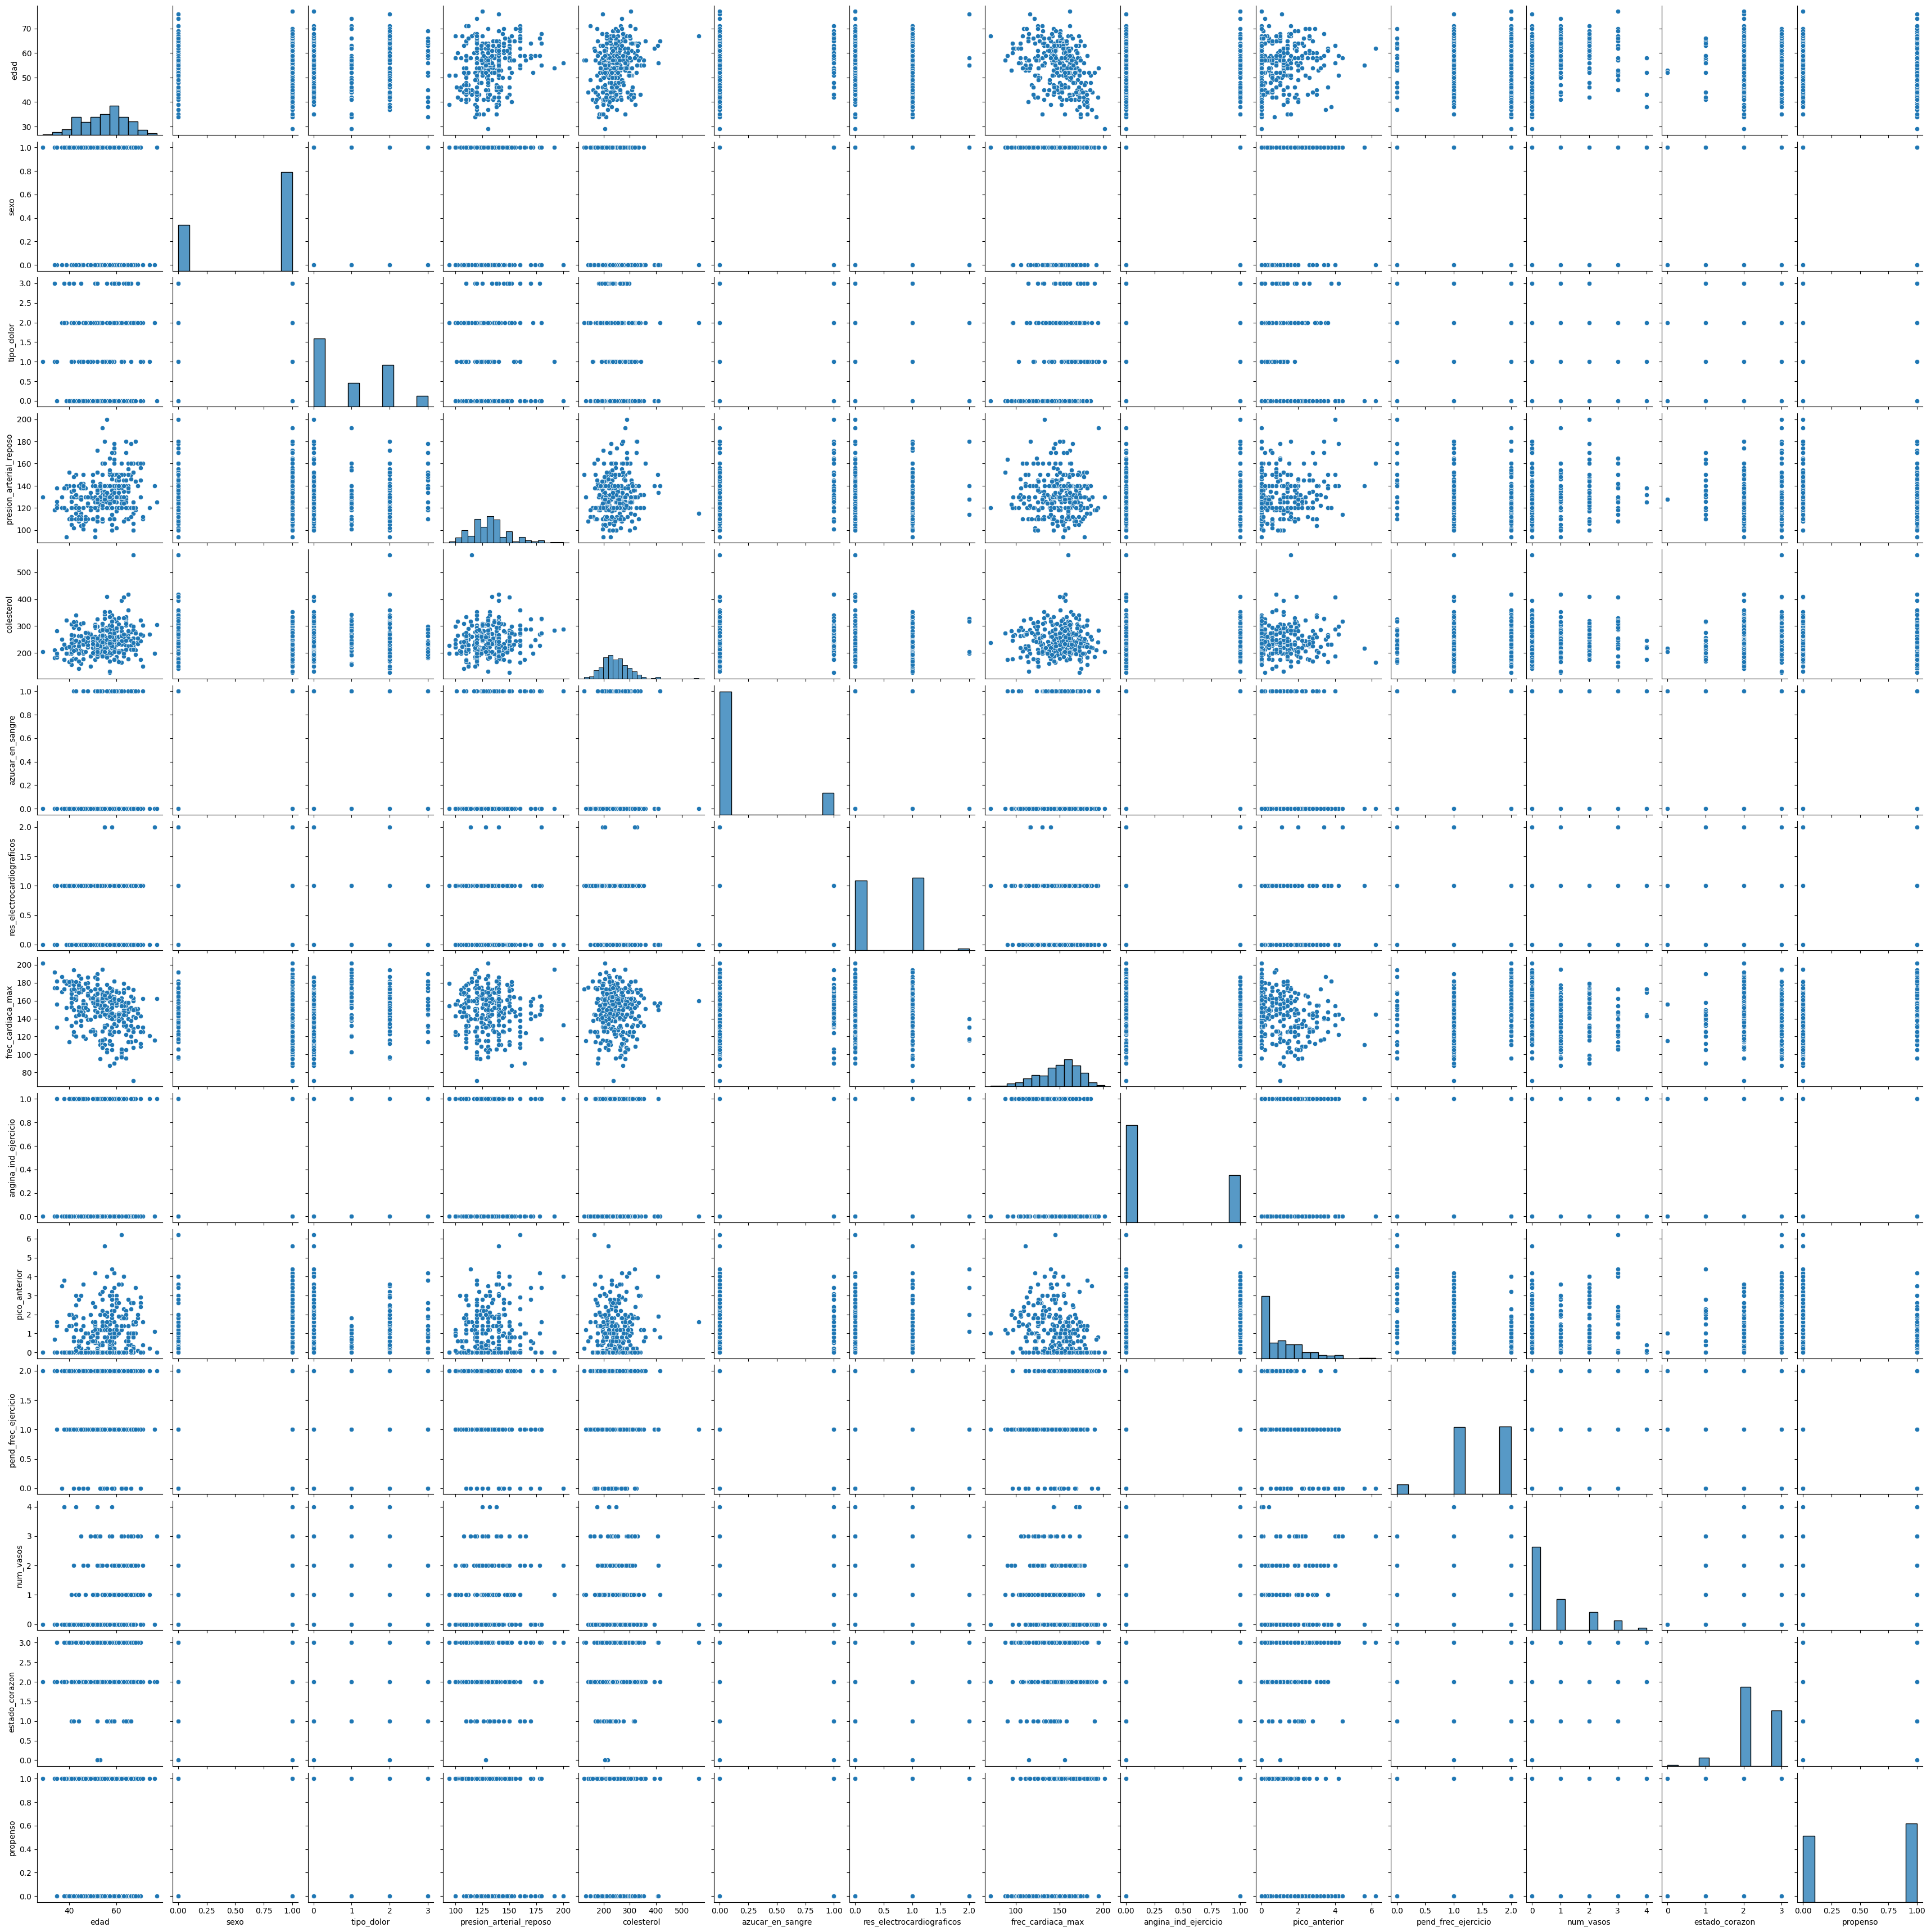

In [21]:
fig = sns.pairplot(df_heart)

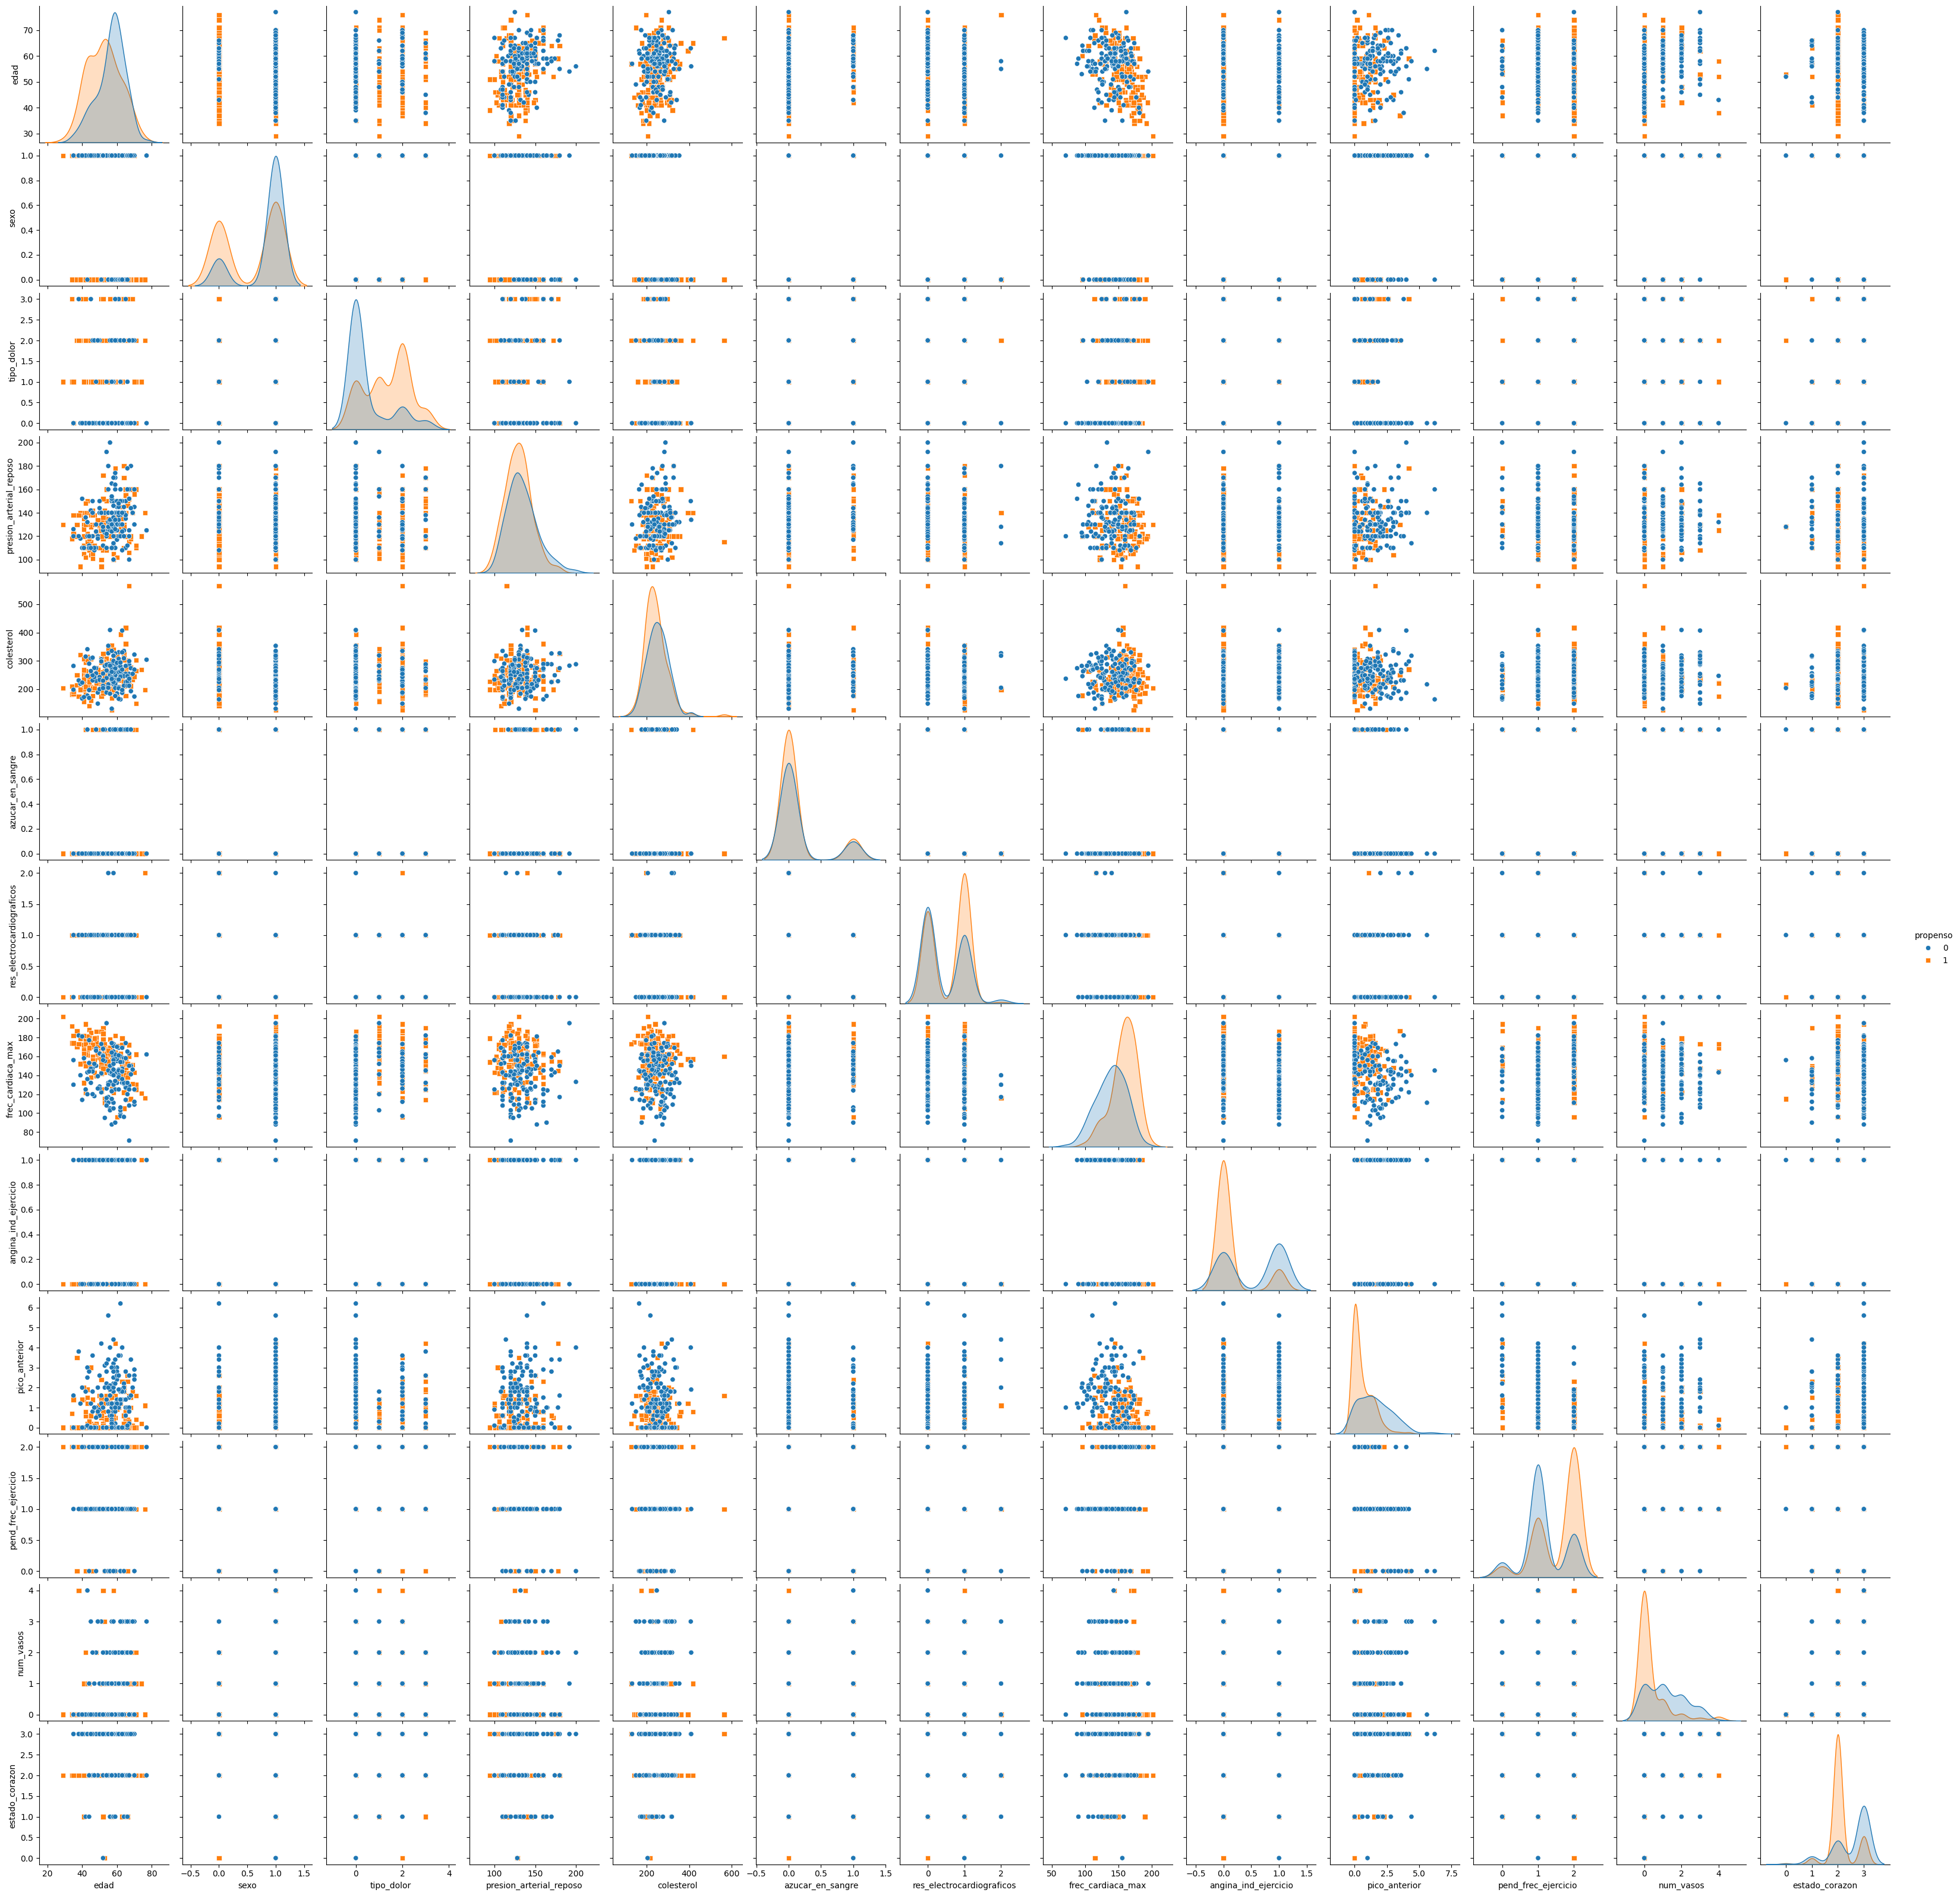

In [22]:
# Observamos las densidades por pares de variables,segun valor de propenso o no
fig = sns.pairplot(df_heart,hue='propenso',markers=["o", "s"])

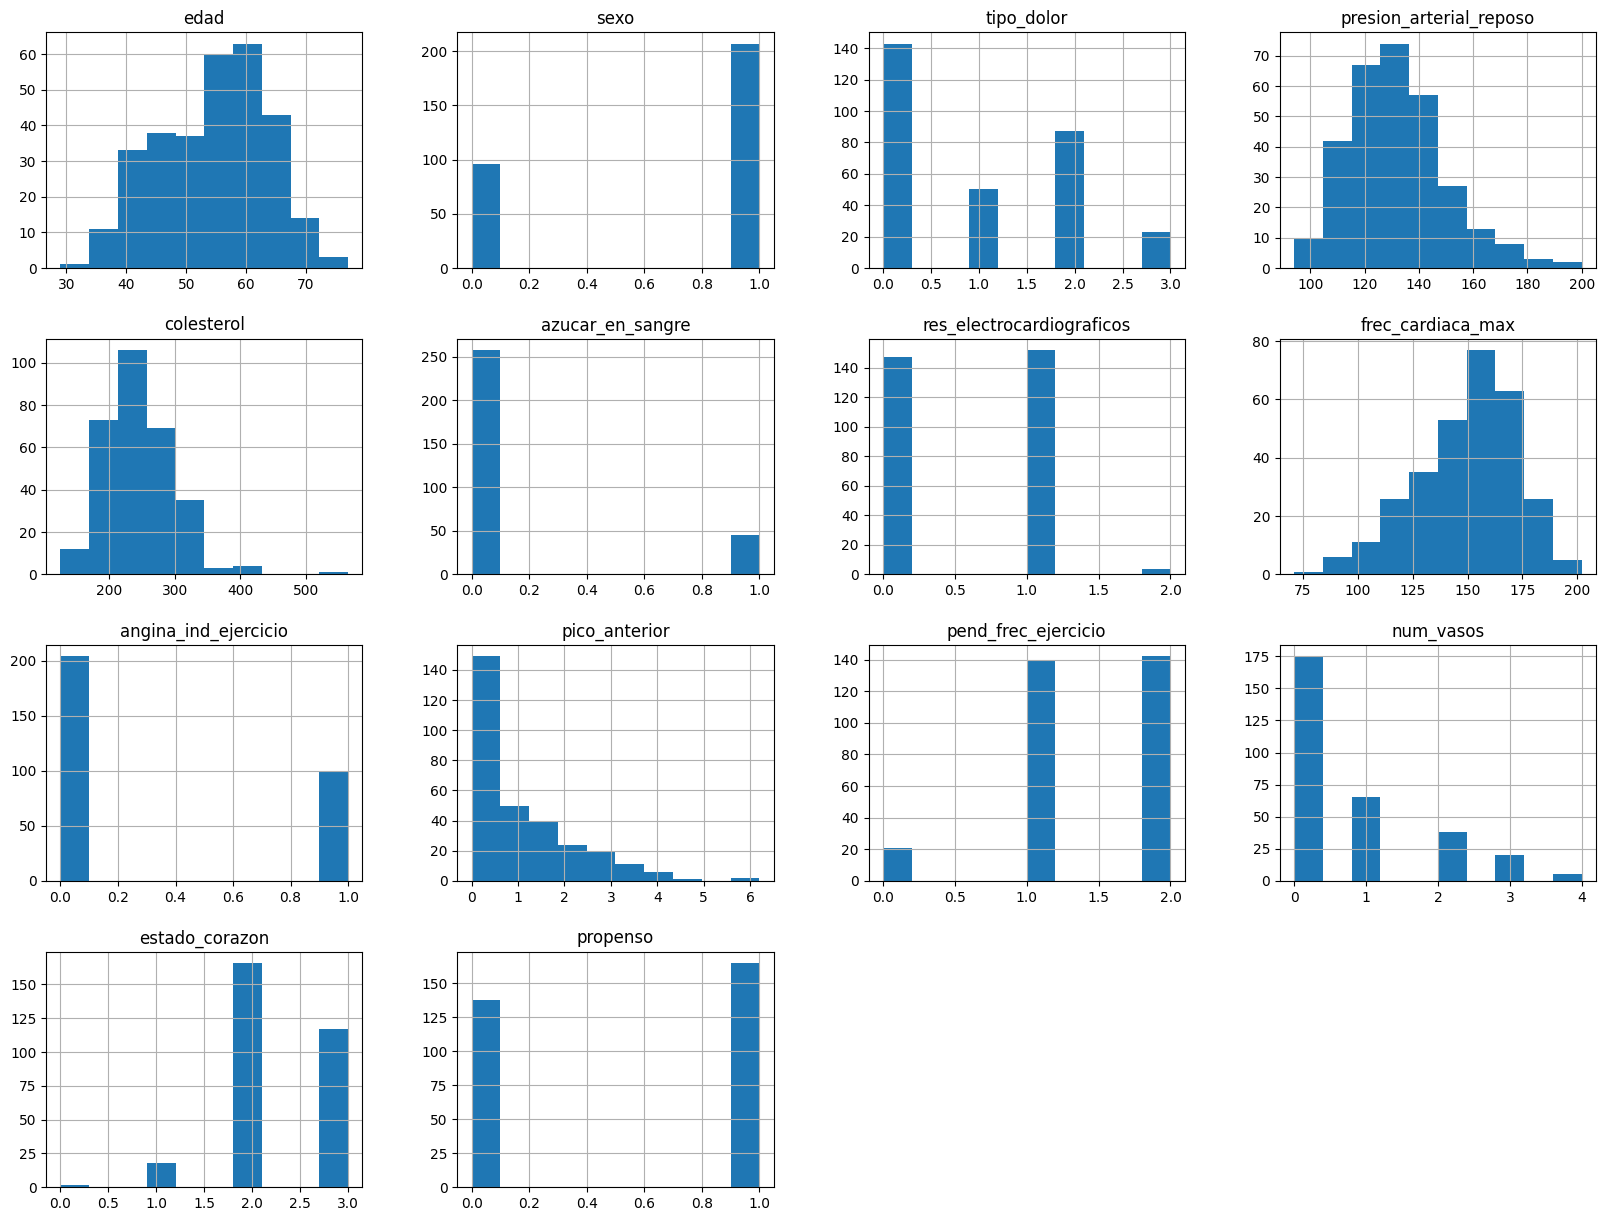

In [23]:
df_heart.hist(figsize=(20,15))
plt.show()

#### Observacion 2
Segun los datos de los graficos anteriores podemos notar que:
* Hay mas muestras de usuarios masculinos.
* Pareciera ser que los datos indican mayor tendencia al ataque cardiaco en el caso de mujeres.
* La mayoria de las muestras no tienen azucar en la sangre.
* Al parecer hay mas muestras de pacientes con dolores producidos por el ejercicio
* La mayoria de las muestras son de personas entre edades de 35-75 al parecer.
    
    

## Revision de outliers

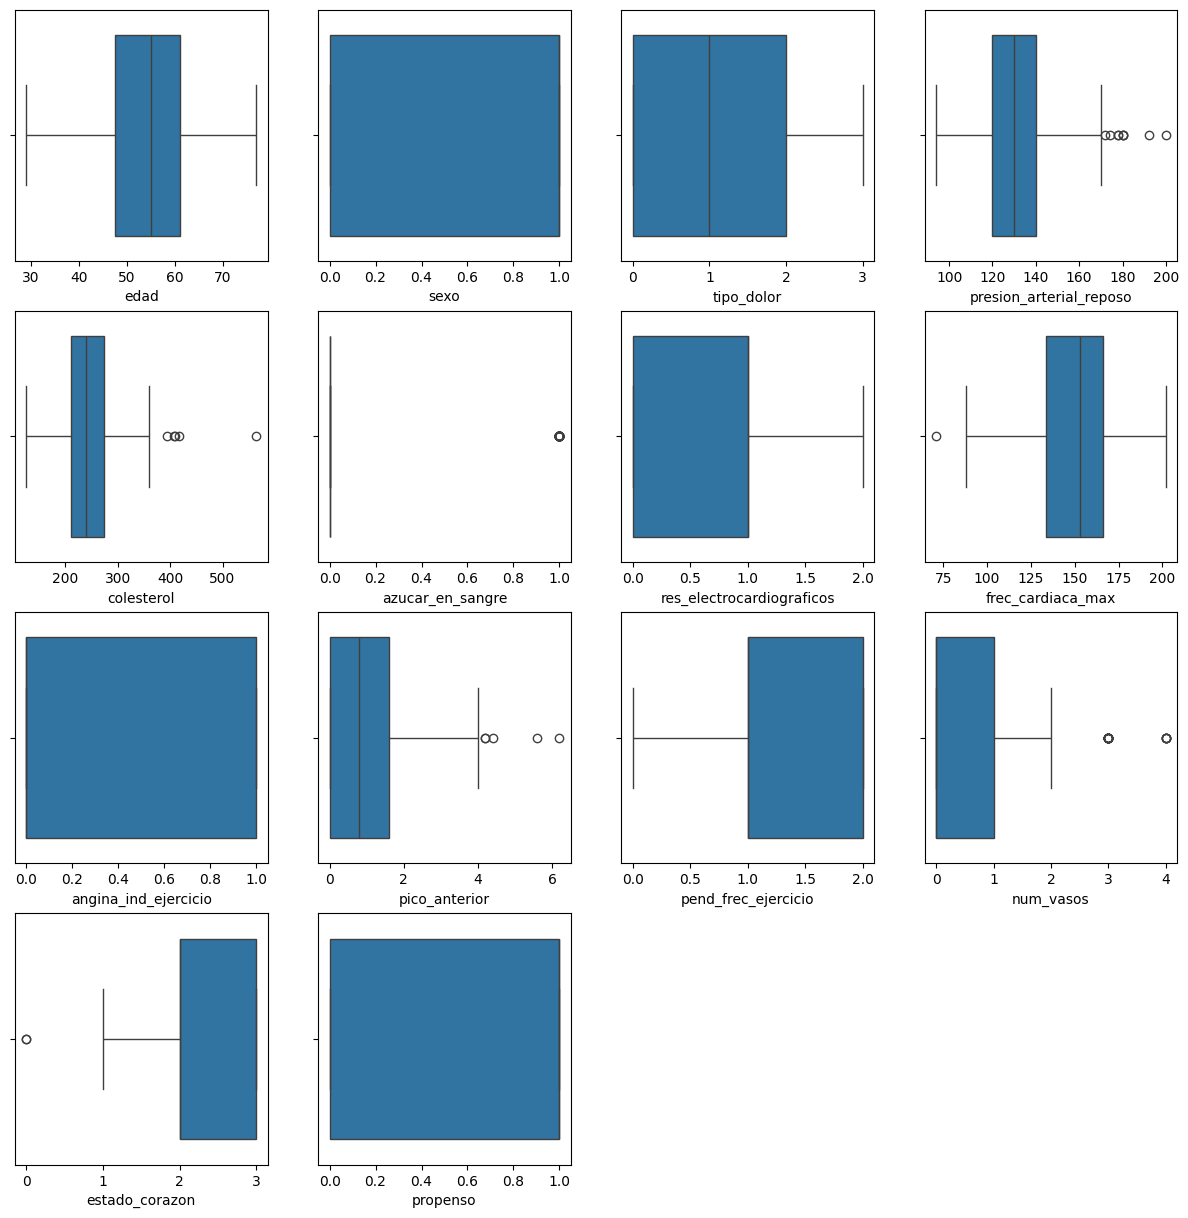

In [24]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(df_heart.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=col, data=df_heart)
plt.show()

#### Analisis de columnas con outliers
Para las columnas con outliers, vamos a analizar su distribucion:

<Axes: xlabel='presion_arterial_reposo', ylabel='Density'>

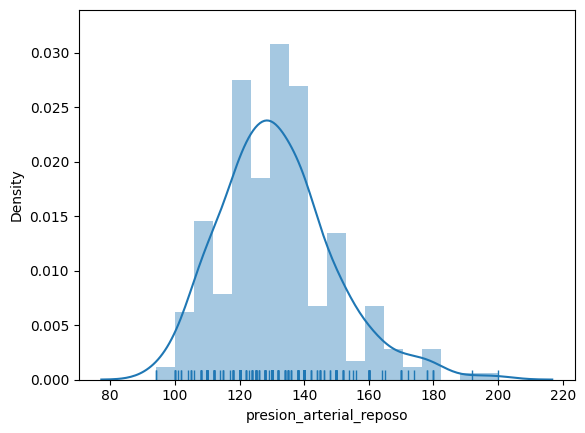

In [25]:
# Columna: presion_arterial_reposo
sns.distplot(df_heart['presion_arterial_reposo'], hist=True, kde=True, rug=True)

<Axes: xlabel='colesterol', ylabel='Density'>

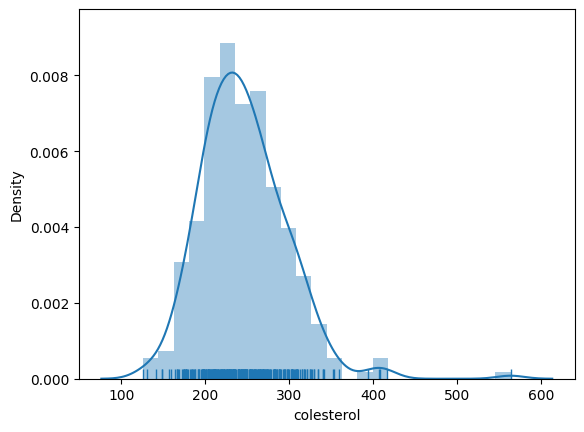

In [26]:
# Columna: colesterol
sns.distplot(df_heart['colesterol'],hist=True, kde=True, rug=True)

<Axes: xlabel='azucar_en_sangre', ylabel='Density'>

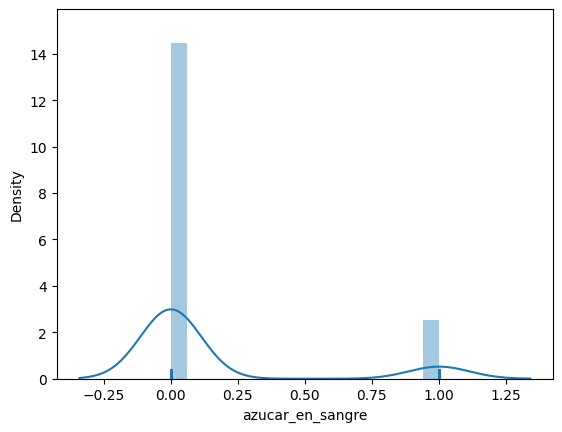

In [27]:
# Columna: azucar_en_sangre
sns.distplot(df_heart['azucar_en_sangre'],hist=True, kde=True, rug=True)

<Axes: xlabel='frec_cardiaca_max', ylabel='Density'>

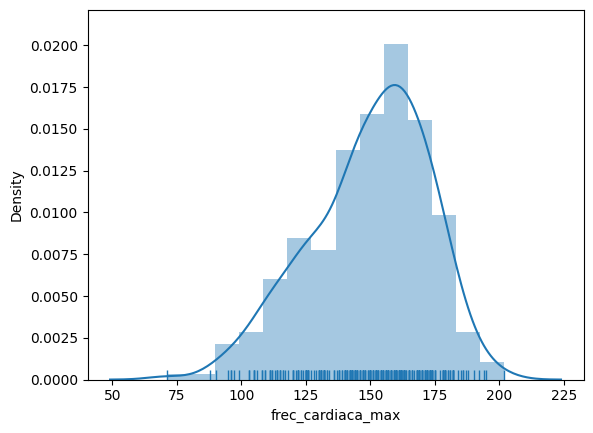

In [28]:
# Columna: frec_cardiaca_max
sns.distplot(df_heart['frec_cardiaca_max'], hist=True, kde=True, rug=True)

<Axes: xlabel='pico_anterior', ylabel='Density'>

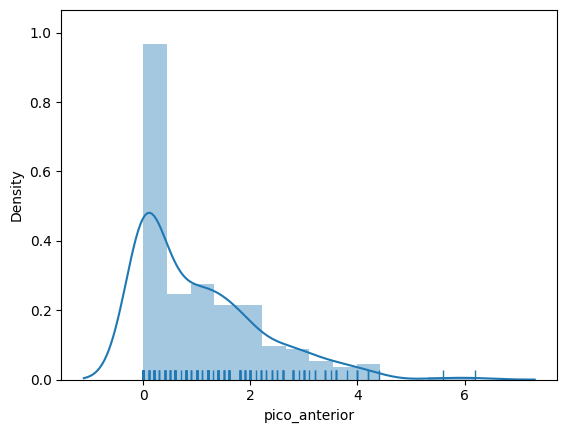

In [29]:
# Columna: pico_anterior
sns.distplot(df_heart['pico_anterior'],hist=True, kde=True, rug=True)

<Axes: xlabel='num_vasos', ylabel='Density'>

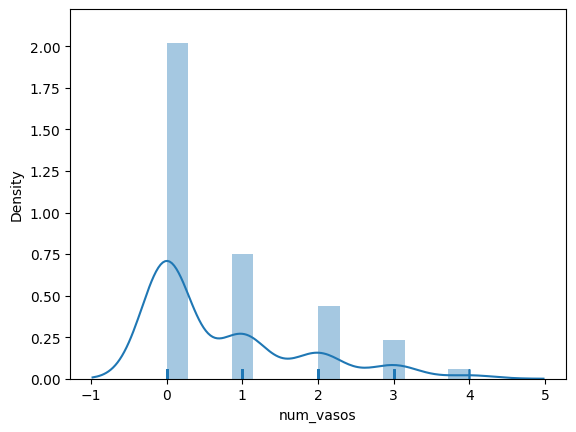

In [30]:
# Columna: num_vasos
sns.distplot(df_heart['num_vasos'],hist=True, kde=True, rug=True)

<Axes: xlabel='estado_corazon', ylabel='Density'>

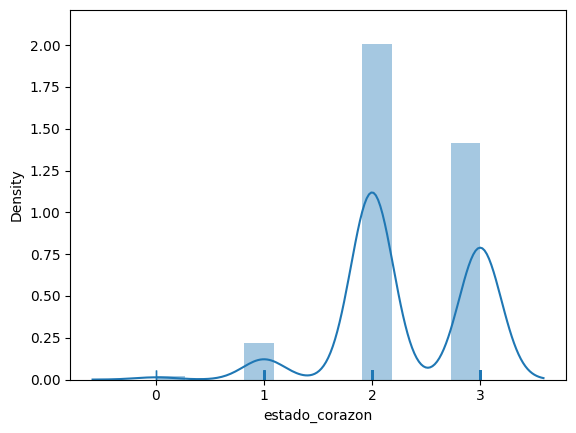

In [31]:
# Columna: estado_corazon
sns.distplot(df_heart['estado_corazon'],hist=True, kde=True, rug=True)

### Vamos a ver cuales son los outliers

In [32]:
# Outliers para la columna: presion_arterial_reposo
Q1 = df_heart['presion_arterial_reposo'].quantile(0.25)
Q3 = df_heart['presion_arterial_reposo'].quantile(0.75)
IQR = Q3 - Q1

# Identificacion de outliers
limite = 1.5
outliers_presion_arterial_reposo_menores = df_heart[(df_heart['presion_arterial_reposo'] < Q1 - limite * IQR)]
outliers_presion_arterial_reposo_mayores = df_heart[(df_heart['presion_arterial_reposo'] > Q3 + limite * IQR)]

In [33]:
# Outliers para la columna: colesterol
Q1 = df_heart['colesterol'].quantile(0.25)
Q3 = df_heart['colesterol'].quantile(0.75)
IQR = Q3 - Q1

# Identificacion de outliers
limite = 1.5
outliers_colesterol_menores = df_heart[(df_heart['colesterol'] < Q1 - limite * IQR)]
outliers_colesterol_mayores = df_heart[(df_heart['colesterol'] > Q3 + limite * IQR)]

In [34]:
# Outliers para la columna: azucar_en_sangre
Q1 = df_heart['azucar_en_sangre'].quantile(0.25)
Q3 = df_heart['azucar_en_sangre'].quantile(0.75)
IQR = Q3 - Q1

# Identificacion de outliers
limite = 1.5

outliers_azucar_en_sangre_menores = df_heart[(df_heart['azucar_en_sangre'] < Q1 - limite * IQR)]
outliers_azucar_en_sangre_mayores = df_heart[(df_heart['azucar_en_sangre'] > Q3 + limite * IQR)]


In [35]:
# Outliers para la columna: frec_cardiaca_max
Q1 = df_heart['frec_cardiaca_max'].quantile(0.25)
Q3 = df_heart['frec_cardiaca_max'].quantile(0.75)
IQR = Q3 - Q1

# Identificacion de outliers
limite = 1.5

outliers_frec_cardiaca_max_menores = df_heart[(df_heart['frec_cardiaca_max'] < Q1 - limite * IQR)]
outliers_frec_cardiaca_max_mayores = df_heart[(df_heart['frec_cardiaca_max'] > Q3 + limite * IQR)]

In [36]:
# Outliers para la columna: pico_anterior
Q1 = df_heart['pico_anterior'].quantile(0.25)
Q3 = df_heart['pico_anterior'].quantile(0.75)
IQR = Q3 - Q1

# Identificacion de outliers
limite = 1.5

outliers_pico_anterior_menores = df_heart[(df_heart['pico_anterior'] < Q1 - limite * IQR)]
outliers_pico_anterior_mayores = df_heart[(df_heart['pico_anterior'] > Q3 + limite * IQR)]

In [37]:
# Outliers para la columna: num_vasos
Q1 = df_heart['num_vasos'].quantile(0.25)
Q3 = df_heart['num_vasos'].quantile(0.75)
IQR = Q3 - Q1

# Identificacion de outliers
limite = 1.5

outliers_num_vasos_menores = df_heart[(df_heart['num_vasos'] < Q1 - limite * IQR)]
outliers_num_vasos_mayores = df_heart[(df_heart['num_vasos'] > Q3 + limite * IQR)]

In [38]:
# Outliers para la columna: estado_corazon
Q1 = df_heart['estado_corazon'].quantile(0.25)
Q3 = df_heart['estado_corazon'].quantile(0.75)
IQR = Q3 - Q1

# Identificacion de outliers
limite = 1.5

outliers_estado_corazon_menores = df_heart[(df_heart['estado_corazon'] < Q1 - limite * IQR)]
outliers_estado_corazon_mayores = df_heart[(df_heart['estado_corazon'] > Q3 + limite * IQR)]

In [39]:
data=[
    ['presion_arterial_reposo', outliers_presion_arterial_reposo_menores.shape[0],
        outliers_presion_arterial_reposo_mayores.shape[0]],
    ['colesterol',outliers_colesterol_menores.shape[0],outliers_colesterol_mayores.shape[0]],
    ['azucar_en_sangre', outliers_azucar_en_sangre_menores.shape[0], outliers_azucar_en_sangre_mayores.shape[0]],
    ['frec_cardiaca_max', outliers_frec_cardiaca_max_menores.shape[0],outliers_frec_cardiaca_max_mayores.shape[0]],
    ['pico_anterior', outliers_pico_anterior_menores.shape[0],outliers_pico_anterior_mayores.shape[0]],
    ['num_vasos',outliers_num_vasos_menores.shape[0],outliers_num_vasos_mayores.shape[0]],
    ['estado_corazon', outliers_estado_corazon_menores.shape[0],
        outliers_estado_corazon_mayores.shape[0]]
]
columns = ['Columna','#Menores','#Mayores']
df_outliers = pd.DataFrame(data,columns=columns)

In [40]:
df_outliers

,Columna,#Menores,#Mayores
0,presion_arterial_reposo,0,9
1,colesterol,0,5
2,azucar_en_sangre,0,45
3,frec_cardiaca_max,1,0
4,pico_anterior,0,5
5,num_vasos,0,25
6,estado_corazon,2,0


#### Observacion 3
Segun los datos anteriores podemos notar que:
* Son muchos los valores que tienen outliers en comparacion con los datos. Por este motivo, seria inconveniente borrar todos los registros de outliers. En su lugar, podemos aplicar por ejemplo una transformacion de escalado estandar o escalado robusto. Ya que la mayor cantidad de outliers son en la columna azucar_en_sangre y num_vasos. Pero son valores que podriamos considerar categoricos.

## HIPOTESIS INICIALES 

* En primera instancia, tenemos un conjunto de datos que, "pensamos que correspondiente y valido" para la generacion del modelo. Pero la idea es verificar si esa hipotesis es correcta, es decir:
Cuán valida, util y determinante pueden ser las variables o datos que tenemos inicialmente para poder llegar al resultado objetivo? Esto es:
    * Que injerencia, preponderancia y/o grado de aporte al modelo tiene cada una de las variables.
    Por ejemplo:
        * Existe alguna relacion entre la edad del paciente y la probabilidad de un ataque cardiaco?
        * El hecho de ser de sexo masculino, aumenta el riesgo de ser mas propenso a tener un ataque cardiaco?
        * Segun los tipos de dolores, se puede decir si tiene riesgo de un ataque cardiaco?
        * El hecho de tener una presion arterial alta, aumenta el riesgo de ser propenso a un ataque cardiaco?
        * El hecho de tener un valor de colesterol, aumenta el riesgo de ser propenso a un ataque cardiaco?
        * Tener azucar en la sangre o no, influye en ser propenso a un ataque cardiaco?
        * Son utiles los resultados electrocardiograficos para determinar la probabilidad de que tenga un ataque cardiaco?
        * Que la frecuencia cardiaca maxima sea alta, influye en la probabilida de que tenga un ataque?
        * El hecho de presentar o no un delor basado en el ejercicio, tiene un significado para la probabilidad de tener un ataque cardiaco?
        * El valor de pico anterior influye en la probabilidad de tener ataque cardiaco?
        * Tiene algun sentido considerar la pendiente de frecuncia de ejercicio para la probabilidad de tener un ataque cardiaco?
        * El valor de numero de vasos importantes tiene alguna implicacion para el modelo a generar?
        * Pareceria logico que el valor del estado del corazon pudiera ser pertinente a considerar por tener alguna injerencia. Sera asi?

### Analisis de la variable objetivo segun las demas variables
Si bien vimos la distribucion segun los pares agrupados, vamos a hacer un analisis, variable por variable. Esto nos podria ayudar a encontrar  cierta relacion mas claramente.

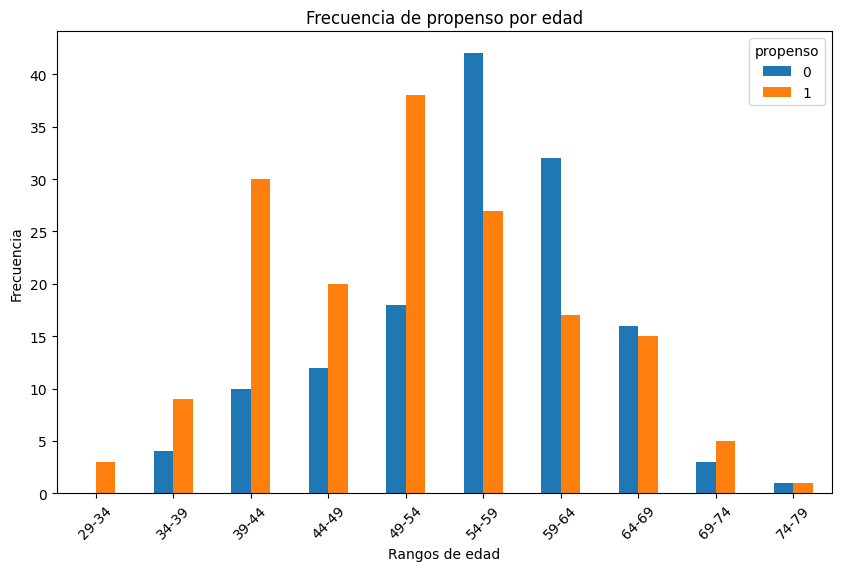

In [41]:
edad_minima = df_heart['edad'].min()
edad_maxima = df_heart['edad'].max()
bins = np.arange(edad_minima, edad_maxima + 5, 5)

labels = [f'{i}-{i+5}' for i in bins[:-1]]
df_heart['cat_edad'] = pd.cut(df_heart['edad'], bins=bins, labels=labels, include_lowest=True)

pd.crosstab(df_heart.cat_edad, df_heart.propenso).plot(kind="bar", figsize=(10, 6))
plt.title('Frecuencia de propenso por edad')
plt.xlabel('Rangos de edad')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.show()

#### Observacion 4
Podriamos decir que entre 39 y 49 años son mas propensos a ataques cardiacos?

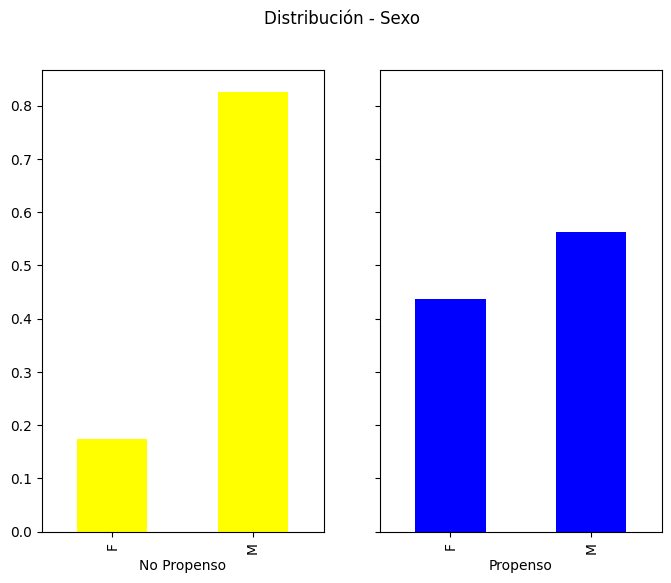

In [42]:
# Relacion de propensos y no propensos segun sexo
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Distribución - Sexo')
(df_heart[df_heart['propenso'] == 0]['sexo']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', color="yellow"))
ax.set_xlabel('No Propenso', size=10)
ax.set_xticklabels(["F", 'M'])

(df_heart[df_heart['propenso'] == 1]['sexo']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', color="blue"))
ax2.set_xlabel('Propenso', size=10)
ax2.set_xticklabels(["F", 'M'])
plt.show()

In [43]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['sexo']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['sexo']
 .value_counts(1)
 .sort_index(),2))

Porporciones no propensos
sexo
0    0.17
1    0.83
Name: proportion, dtype: float64
Porporciones propensos
sexo
0    0.44
1    0.56
Name: proportion, dtype: float64


#### Observacion 5
Podriamos decir que:
* Dentro de los propensos, la distribucion es similar?
* Dentro de los no propensos, la mayoria son hombres?


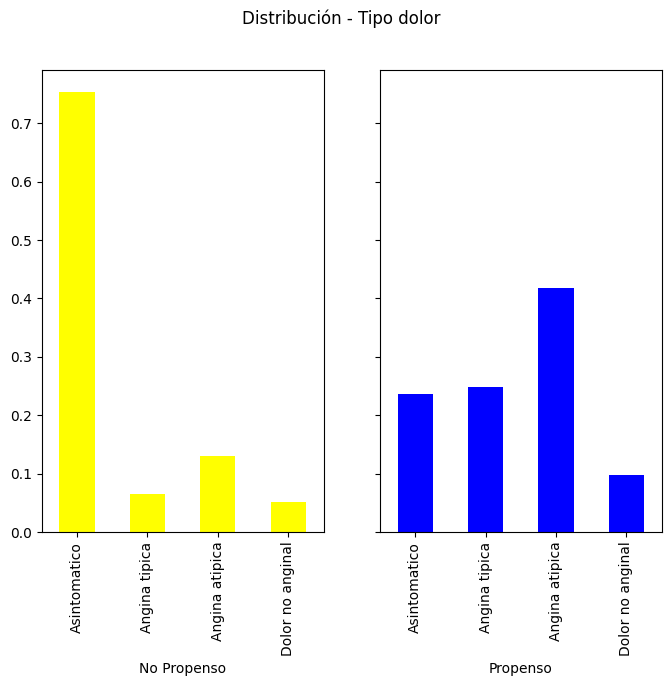

In [44]:
# Relacion de propensos y no propensos segun tipo_dolor
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Distribución - Tipo dolor')
(df_heart[df_heart['propenso'] == 0]['tipo_dolor']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', color="yellow"))
ax.set_xlabel('No Propenso', size=10)
ax.set_xticklabels(["Asintomatico", 'Angina tipica',
                   'Angina atipica', 'Dolor no anginal'])

(df_heart[df_heart['propenso'] == 1]['tipo_dolor']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', color="blue"))
ax2.set_xlabel('Propenso', size=10)
ax2.set_xticklabels(["Asintomatico", 'Angina tipica',
                   'Angina atipica', 'Dolor no anginal'])
plt.show()

In [45]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['tipo_dolor']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['tipo_dolor']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
tipo_dolor
0    0.75
1    0.07
2    0.13
3    0.05
Name: proportion, dtype: float64
Porporciones propensos
tipo_dolor
0    0.24
1    0.25
2    0.42
3    0.10
Name: proportion, dtype: float64


#### Observacion 6
Podriamos decir que:
* Dentro de los no propensos, la mayoria son asintomaticos?
* Dentro de los propensos, el dolor de angina atipica es un indicativo en cierta medida?


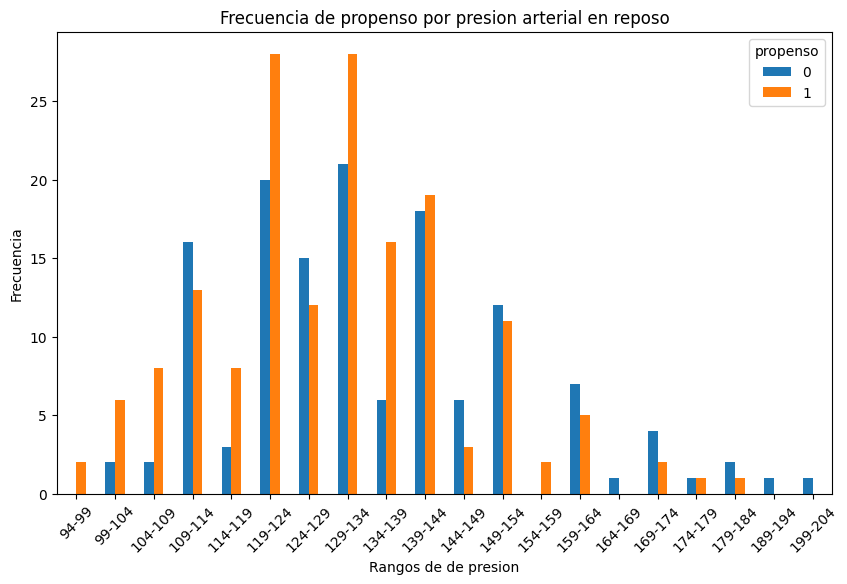

In [46]:
par_minima = df_heart['presion_arterial_reposo'].min()
par_maxima = df_heart['presion_arterial_reposo'].max()
bins = np.arange(par_minima, par_maxima + 5, 5)

labels = [f'{i}-{i+5}' for i in bins[:-1]]
df_heart['cat_par'] = pd.cut(
    df_heart['presion_arterial_reposo'], bins=bins, labels=labels, include_lowest=True)

pd.crosstab(df_heart.cat_par, df_heart.propenso).plot(
    kind="bar", figsize=(10, 6))
plt.title('Frecuencia de propenso por presion arterial en reposo')
plt.xlabel('Rangos de de presion')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.show()

In [47]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['cat_par']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['cat_par']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
cat_par
94-99      0.00
99-104     0.01
104-109    0.01
109-114    0.12
114-119    0.02
119-124    0.14
124-129    0.11
129-134    0.15
134-139    0.04
139-144    0.13
144-149    0.04
149-154    0.09
154-159    0.00
159-164    0.05
164-169    0.01
169-174    0.03
174-179    0.01
179-184    0.01
184-189    0.00
189-194    0.01
194-199    0.00
199-204    0.01
Name: proportion, dtype: float64
Porporciones propensos
cat_par
94-99      0.01
99-104     0.04
104-109    0.05
109-114    0.08
114-119    0.05
119-124    0.17
124-129    0.07
129-134    0.17
134-139    0.10
139-144    0.12
144-149    0.02
149-154    0.07
154-159    0.01
159-164    0.03
164-169    0.00
169-174    0.01
174-179    0.01
179-184    0.01
184-189    0.00
189-194    0.00
194-199    0.00
199-204    0.00
Name: proportion, dtype: float64


#### Observacion 7
Podriamos decir que:
* Dentro de los no propensos, despues del valor 144 es menos probable?
* Dentro de los propensos, para valores entre 119 y 144 es mayor la probabilidad?

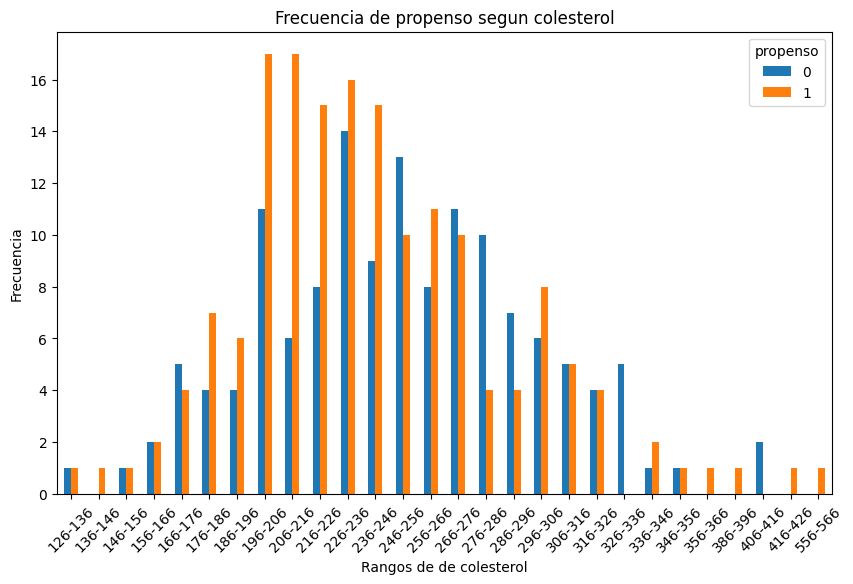

In [48]:
col_minima = df_heart['colesterol'].min()
col_maxima = df_heart['colesterol'].max()
bins = np.arange(col_minima, col_maxima + 10, 10)

labels = [f'{i}-{i+10}' for i in bins[:-1]]
df_heart['cat_col'] = pd.cut(
    df_heart['colesterol'], bins=bins, labels=labels, include_lowest=True)

pd.crosstab(df_heart.cat_col, df_heart.propenso).plot(
    kind="bar", figsize=(10, 6))
plt.title('Frecuencia de propenso segun colesterol')
plt.xlabel('Rangos de de colesterol')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.show()

In [49]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['cat_col']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['cat_col']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
cat_col
126-136    0.01
136-146    0.00
146-156    0.01
156-166    0.01
166-176    0.04
176-186    0.03
186-196    0.03
196-206    0.08
206-216    0.04
216-226    0.06
226-236    0.10
236-246    0.07
246-256    0.09
256-266    0.06
266-276    0.08
276-286    0.07
286-296    0.05
296-306    0.04
306-316    0.04
316-326    0.03
326-336    0.04
336-346    0.01
346-356    0.01
356-366    0.00
366-376    0.00
376-386    0.00
386-396    0.00
396-406    0.00
406-416    0.01
416-426    0.00
426-436    0.00
436-446    0.00
446-456    0.00
456-466    0.00
466-476    0.00
476-486    0.00
486-496    0.00
496-506    0.00
506-516    0.00
516-526    0.00
526-536    0.00
536-546    0.00
546-556    0.00
556-566    0.00
Name: proportion, dtype: float64
Porporciones propensos
cat_col
126-136    0.01
136-146    0.01
146-156    0.01
156-166    0.01
166-176    0.02
176-186    0.04
186-196    0.04
196-206    0.10
206-216    0.10
216-226    0.09
226-236    0.10
236-246    0.09
246-25

#### Observacion 8
Podriamos decir que:
* Dentro de los no propensos, sera posible que la franja de valores para el colesterol entre 196 y 276 pueda ser un indicativo para ?
* Dentro de los propensos, para valores entre 119 y 144 es mayor la probabilidad de infarto de corazon?

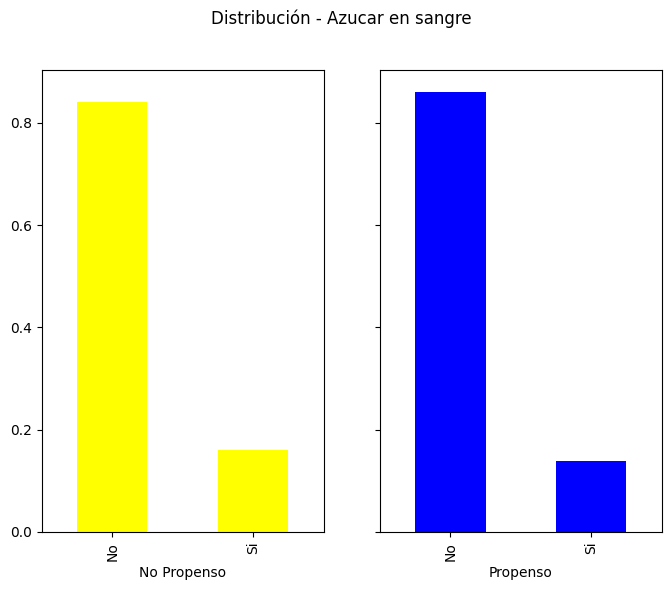

In [50]:
# Relacion de propensos y no propensos segun tipo_dolor
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Distribución - Azucar en sangre')
(df_heart[df_heart['propenso'] == 0]['azucar_en_sangre']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', color="yellow"))
ax.set_xlabel('No Propenso', size=10)
ax.set_xticklabels(["No", 'Si'])

(df_heart[df_heart['propenso'] == 1]['azucar_en_sangre']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', color="blue"))
ax2.set_xlabel('Propenso', size=10)
ax2.set_xticklabels(["No", 'Si'])
plt.show()

In [51]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['azucar_en_sangre']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['azucar_en_sangre']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
azucar_en_sangre
0    0.84
1    0.16
Name: proportion, dtype: float64
Porporciones propensos
azucar_en_sangre
0    0.86
1    0.14
Name: proportion, dtype: float64


#### Observacion 9
Podriamos decir que:
* Independientemente de las muestras, las proporciones parecen ser similares. Independientemente de si se tratan de propensos o no a un ataque cardiaco.

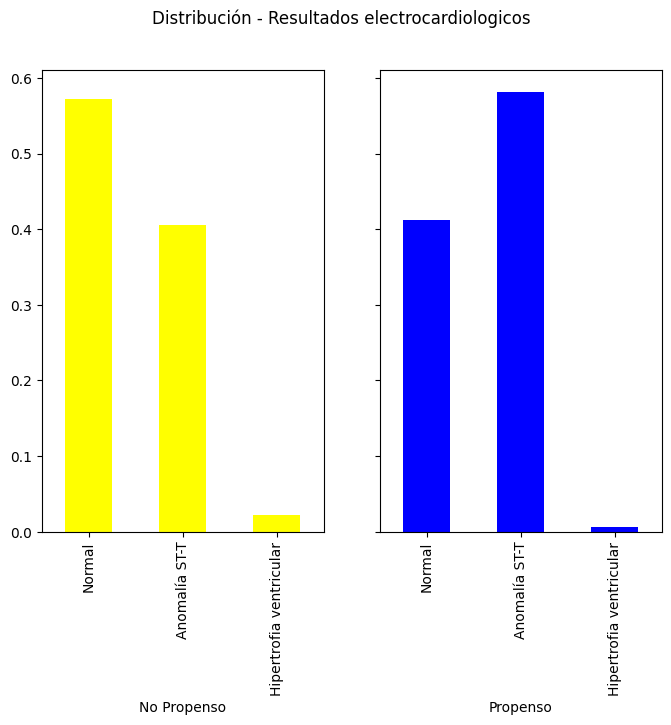

In [52]:
# Relacion de propensos y no propensos segun resultados electrocardiologicos
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Distribución - Resultados electrocardiologicos')
(df_heart[df_heart['propenso'] == 0]['res_electrocardiograficos']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', color="yellow"))
ax.set_xlabel('No Propenso', size=10)
ax.set_xticklabels(["Normal", 'Anomalía ST-T','Hipertrofia ventricular',])

(df_heart[df_heart['propenso'] == 1]['res_electrocardiograficos']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', color="blue"))
ax2.set_xlabel('Propenso', size=10)
ax2.set_xticklabels(["Normal", 'Anomalía ST-T','Hipertrofia ventricular',])
plt.show()

In [53]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['res_electrocardiograficos']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['res_electrocardiograficos']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
res_electrocardiograficos
0    0.57
1    0.41
2    0.02
Name: proportion, dtype: float64
Porporciones propensos
res_electrocardiograficos
0    0.41
1    0.58
2    0.01
Name: proportion, dtype: float64


#### Observacion 10
Podriamos decir que:
* Pareciera que para el caso de no propensos, el porcentaje de muestras "Normal" es mayor. Por lo cual, podria ser que esta variable pueda ayudar a predecir?
* Por otro lado, para el caso de propensos a un infarto, los casos que presentan resultados de "Anomalia ST-T" son un poquito mayores. Por lo cual, podria ser que esta variable pueda ayudar a predecir?

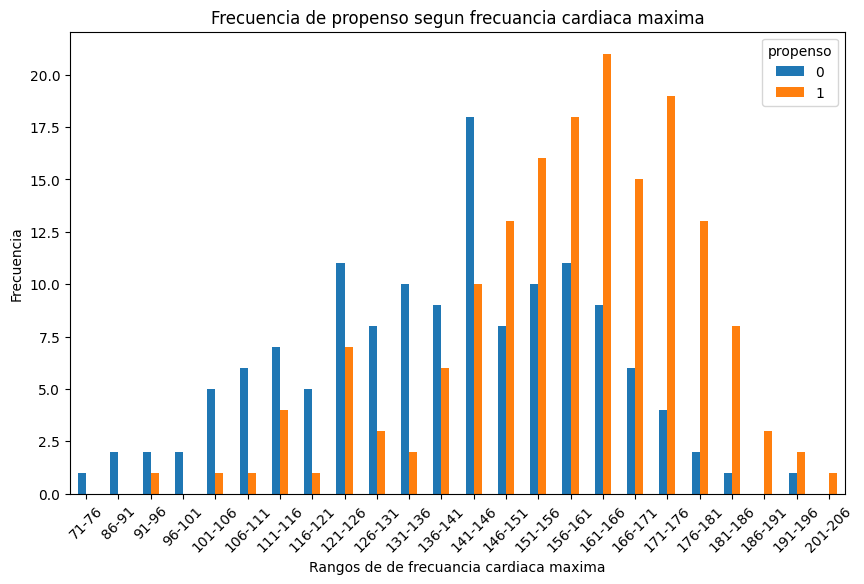

In [54]:
# Relacion de propensos y no propensos segun resultados frecuencia cardiaca maxima
fc_minima = df_heart['frec_cardiaca_max'].min()
fc_maxima = df_heart['frec_cardiaca_max'].max()
bins = np.arange(fc_minima, fc_maxima + 5, 5)

labels = [f'{i}-{i+5}' for i in bins[:-1]]
df_heart['cat_fcm'] = pd.cut(
    df_heart['frec_cardiaca_max'], bins=bins, labels=labels, include_lowest=True)

pd.crosstab(df_heart.cat_fcm, df_heart.propenso).plot(
    kind="bar", figsize=(10, 6))
plt.title('Frecuencia de propenso segun frecuancia cardiaca maxima')
plt.xlabel('Rangos de de frecuancia cardiaca maxima')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.show()

In [55]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['cat_fcm']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['cat_fcm']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
cat_fcm
71-76      0.01
76-81      0.00
81-86      0.00
86-91      0.01
91-96      0.01
96-101     0.01
101-106    0.04
106-111    0.04
111-116    0.05
116-121    0.04
121-126    0.08
126-131    0.06
131-136    0.07
136-141    0.07
141-146    0.13
146-151    0.06
151-156    0.07
156-161    0.08
161-166    0.07
166-171    0.04
171-176    0.03
176-181    0.01
181-186    0.01
186-191    0.00
191-196    0.01
196-201    0.00
201-206    0.00
Name: proportion, dtype: float64
Porporciones propensos
cat_fcm
71-76      0.00
76-81      0.00
81-86      0.00
86-91      0.00
91-96      0.01
96-101     0.00
101-106    0.01
106-111    0.01
111-116    0.02
116-121    0.01
121-126    0.04
126-131    0.02
131-136    0.01
136-141    0.04
141-146    0.06
146-151    0.08
151-156    0.10
156-161    0.11
161-166    0.13
166-171    0.09
171-176    0.12
176-181    0.08
181-186    0.05
186-191    0.02
191-196    0.01
196-201    0.00
201-206    0.01
Name: proportion, dtype: float64


#### Observacion 11
Podriamos decir que:
* Dentro de los no propensos, sera posible que la franja de valores para la frecuencia cardiaca maxima menores que 141 pueda ser un indicativo?
* Dentro de los propensos, para valores mayores que 141 es mayor la probabilidad de infarto de corazon?

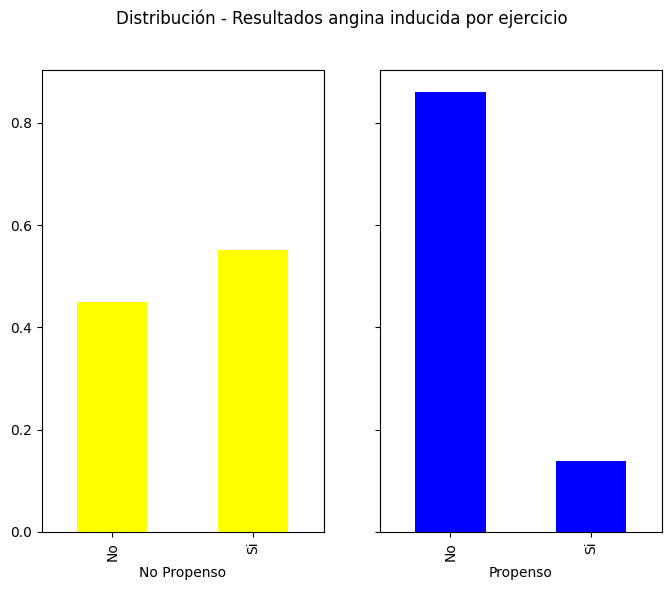

In [56]:
# Relacion de propensos y no propensos segun resultados angina producida por ejercicio
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Distribución - Resultados angina inducida por ejercicio')
(df_heart[df_heart['propenso'] == 0]['angina_ind_ejercicio']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', color="yellow"))
ax.set_xlabel('No Propenso', size=10)
ax.set_xticklabels(['No','Si',])

(df_heart[df_heart['propenso'] == 1]['angina_ind_ejercicio']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', color="blue"))
ax2.set_xlabel('Propenso', size=10)
ax2.set_xticklabels(['No','Si',])
plt.show()

In [57]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['angina_ind_ejercicio']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['angina_ind_ejercicio']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
angina_ind_ejercicio
0    0.45
1    0.55
Name: proportion, dtype: float64
Porporciones propensos
angina_ind_ejercicio
0    0.86
1    0.14
Name: proportion, dtype: float64


#### Observacion 12
Podriamos decir que:
* Sera que el valor de angina producida por ejercicio, no es indicativo de que un paciente es propenso?

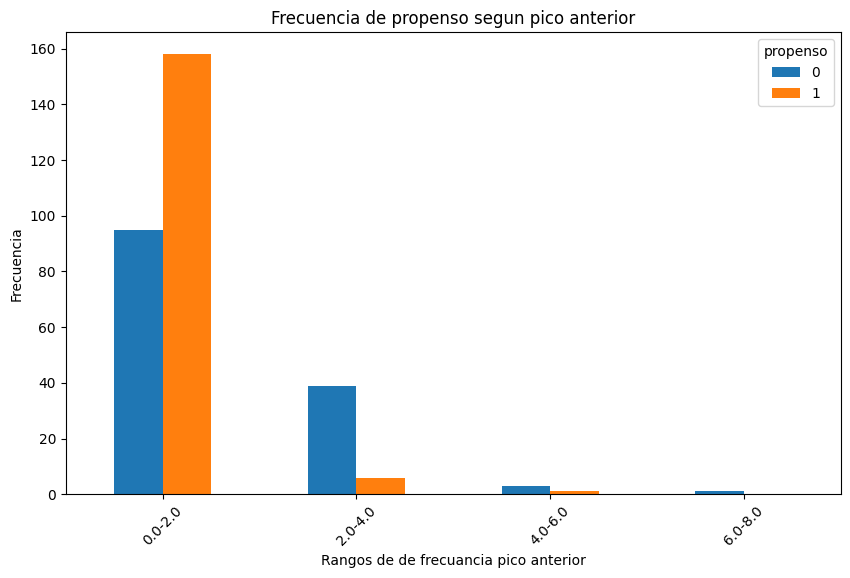

In [58]:
# Relacion de propensos y no propensos segun resultados frecuencia cardiaca maxima
pa_minima = df_heart['pico_anterior'].min()
pa_maxima = df_heart['pico_anterior'].max()
bins = np.arange(pa_minima, pa_maxima + 2, 2)

labels = [f'{i}-{i+2}' for i in bins[:-1]]
df_heart['cat_pa'] = pd.cut(
    df_heart['pico_anterior'], bins=bins, labels=labels, include_lowest=True)

pd.crosstab(df_heart.cat_pa, df_heart.propenso).plot(
    kind="bar", figsize=(10, 6))
plt.title('Frecuencia de propenso segun pico anterior')
plt.xlabel('Rangos de de frecuancia pico anterior')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.show()

In [59]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['cat_pa']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['cat_pa']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
cat_pa
0.0-2.0    0.69
2.0-4.0    0.28
4.0-6.0    0.02
6.0-8.0    0.01
Name: proportion, dtype: float64
Porporciones propensos
cat_pa
0.0-2.0    0.96
2.0-4.0    0.04
4.0-6.0    0.01
6.0-8.0    0.00
Name: proportion, dtype: float64


#### Observacion 13
Podriamos decir que:
* Pareceria no haber una conjetura de clasificacion. Excepto que para valores pequeños de pico anterior se dan la mayor cantidad de muestras, tanto para propensos como para no propensos.

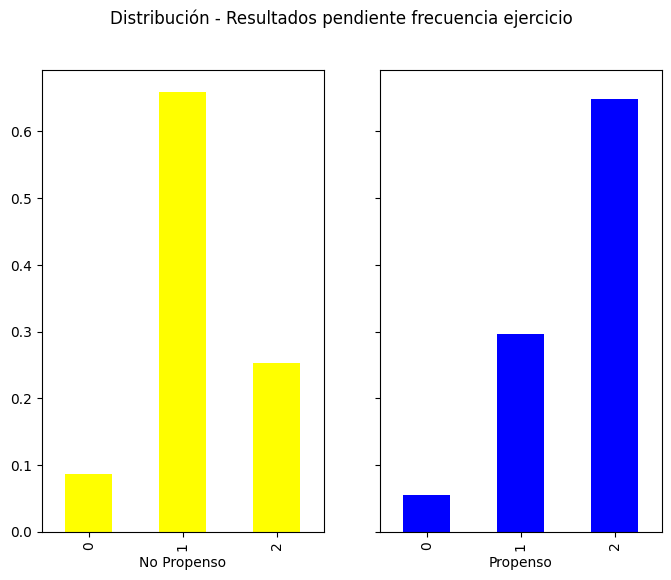

In [60]:
# Relacion de propensos y no propensos segun resultados pendiente frecuencia ejercicio
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Distribución - Resultados pendiente frecuencia ejercicio')
(df_heart[df_heart['propenso'] == 0]['pend_frec_ejercicio']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', color="yellow"))
ax.set_xlabel('No Propenso', size=10)
ax.set_xticklabels(["0", '1','2',])

(df_heart[df_heart['propenso'] == 1]['pend_frec_ejercicio']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', color="blue"))
ax2.set_xlabel('Propenso', size=10)
ax2.set_xticklabels(["0", '1','2',])
plt.show()

In [61]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['pend_frec_ejercicio']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['pend_frec_ejercicio']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
pend_frec_ejercicio
0    0.09
1    0.66
2    0.25
Name: proportion, dtype: float64
Porporciones propensos
pend_frec_ejercicio
0    0.05
1    0.30
2    0.65
Name: proportion, dtype: float64


#### Observacion 14
Podriamos decir que:
* De los valores registrados, en los no propensos, el valor 1 es el preponderante.
* De los valores registrados, en los propensos, el valor 2 es el preponderante.

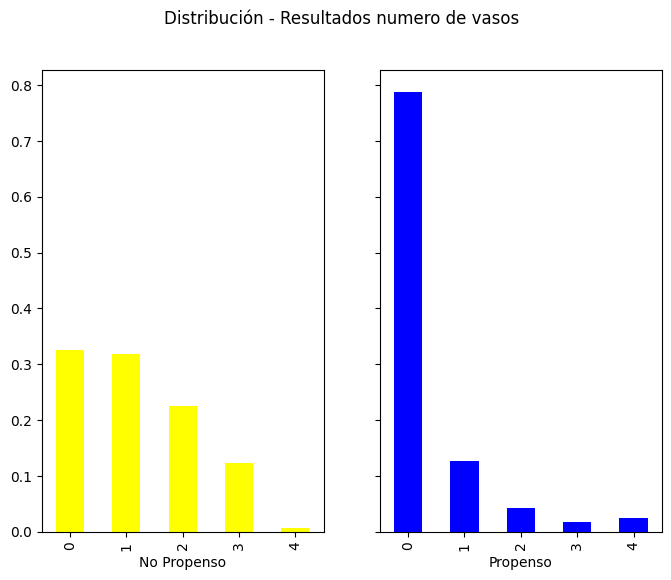

In [62]:
# Relacion de propensos y no propensos segun numero de vasos
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Distribución - Resultados numero de vasos')
(df_heart[df_heart['propenso'] == 0]['num_vasos']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', color="yellow"))
ax.set_xlabel('No Propenso', size=10)
ax.set_xticklabels(['0', '1', '2', '3','4'])

(df_heart[df_heart['propenso'] == 1]['num_vasos']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', color="blue"))
ax2.set_xlabel('Propenso', size=10)
ax2.set_xticklabels(['0', '1', '2', '3','4'])
plt.show()

In [63]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['num_vasos']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['num_vasos']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
num_vasos
0    0.33
1    0.32
2    0.22
3    0.12
4    0.01
Name: proportion, dtype: float64
Porporciones propensos
num_vasos
0    0.79
1    0.13
2    0.04
3    0.02
4    0.02
Name: proportion, dtype: float64


#### Observacion 15
Podriamos decir que:
* Pareceria haber un valor preponderante dentro de las muestras en general, siendo en el caso de los propensos el valor 0 un valor significativo y que podria ayudar a identificar en primera instancia.

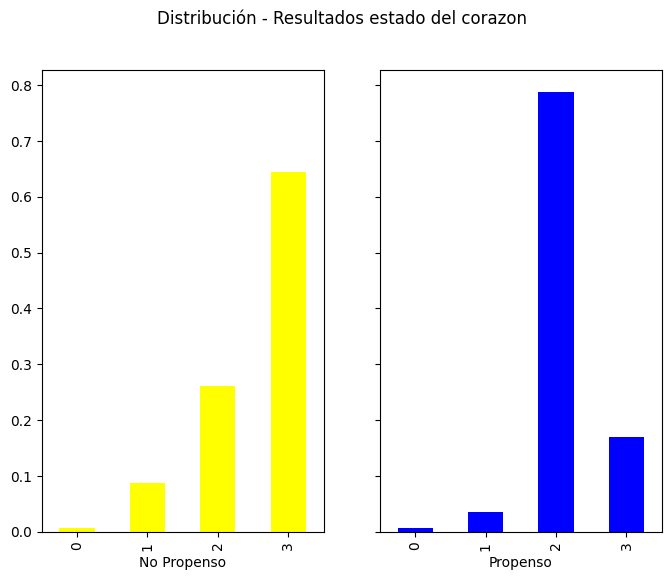

In [64]:
# Relacion de propensos y no propensos segun estado del corazon
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
fig.suptitle('Distribución - Resultados estado del corazon')
(df_heart[df_heart['propenso'] == 0]['estado_corazon']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', color="yellow"))
ax.set_xlabel('No Propenso', size=10)
ax.set_xticklabels(['0', '1', '2', '3'])

(df_heart[df_heart['propenso'] == 1]['estado_corazon']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', color="blue"))
ax2.set_xlabel('Propenso', size=10)
ax2.set_xticklabels(['0', '1', '2', '3'])
plt.show()

In [65]:
# Porcentajes
print('Porporciones no propensos')
print(round(df_heart[df_heart['propenso'] == 0]['estado_corazon']
            .value_counts(1)
            .sort_index(), 2))
print('Porporciones propensos')
print(round(df_heart[df_heart['propenso'] == 1]['estado_corazon']
            .value_counts(1)
            .sort_index(), 2))

Porporciones no propensos
estado_corazon
0    0.01
1    0.09
2    0.26
3    0.64
Name: proportion, dtype: float64
Porporciones propensos
estado_corazon
0    0.01
1    0.04
2    0.79
3    0.17
Name: proportion, dtype: float64


#### Observacion 16
Podriamos decir que:
* Para los no propensos, el valor 3 pareceria tener mayor prevalecencia.
* Paa los propensos, el valor 2 se encuentra en mayor proporcion.
* Podrian llegar a ser valores que ayuden a la deteccion.

### RESUMEN DE ENTENDIMIENTO DEL NEGOCIO Y DATOS

*   En cuanto al estado, salud y calidad de los datos (inicial):
    * Pareciera ser que los datos estan bastante organizados.
    * No se encuentran incoherencias en los valores, como ser negativos, etc.
    * Es un conjunto de datos manejables.
    * Los tipos de datos iniciales, parecen logicos.
    * En general no se encuentran relaciones fuertes entre las variables independientes y la dependiente.
    * Ya que:
        *   El objetivo del modelo es poder determinar un valor verdadero/falso o si/no.
        *   Contamos con una variable objetivo o etiqueta de valor resultante. Por lo cual utilizariamos un modelo de algoritmo supervisado.
        *   ## Vamos a usar un modelo de clasificacion logica
*   En cuanto a algunos tratamientos a realizar,si corresponden:
    *   Registros duplicados
        *   Eliminar registros duplicados
    *   Valores nulos
        * No hay
    *   Columnas derivadas de categoricas (transformaciones)
        *   Aunque no existen columnas categoricas en si (ya que estan codificadas numericamente ya), entendemos ciertas columnas tienen un origen categorico. Por lo cual se podrian haber tratado con un enfoque mas general, como podrian ser las columnas:
            *   sexo
                *   Que se podria haber aplicado la transformacion "LabelBinarizer" dando un resultado similar.
            *   angina_ind_ejercicio
                *   Que se podria haber aplicado la transformacion "LabelBinarizer" dando un resultado similar.
            *   axucar_en_sangre
                *   Que se podria haber aplicado la transformacion "LabelBinarizer" dando un resultado similar.
            *   tipo_dolor
                *   Que podria se podria haber tratado aplicando la transformacion de OneHotEncoding o get_dummies, para obtener columnas segun el valor para cada observacion, teniendo cuidado de NO caer en la trampa dummy (se debe de eliminar una columna de las que genere).
            *   num_vasos
                *   Que podria se podria haber tratado aplicando la transformacion de OneHotEncoding o get_dummies, para obtener columnas segun el valor para cada observacion, teniendo cuidado de NO caer en la trampa dummy (se debe de eliminar una columna de las que genere).
            *   res_electrocardiograficos
                *   Que podria se podria haber tratado aplicando la transformacion de OneHotEncoding o get_dummies, para obtener columnas segun el valor para cada observacion, teniendo cuidado de NO caer en la trampa dummy (se debe de eliminar una columna de las que genere).
            *   estado_corazon
                *   Que podria se podria haber tratado aplicando la transformacion de OneHotEncoding o get_dummies, para obtener columnas segun el valor para cada observacion, teniendo cuidado de NO caer en la trampa dummy (se debe de eliminar una columna de las que genere).
        *   Como vimos, del analisis:
            *   Seria conveniente:
                *   Realizar una transformacion logaritmica a las columnas:
                    *   presion_arterial_reposo
                    *   colesterol
                    *   frec_cardiaca_max
                    *   pico_anterior
*   Seleccion de algoritmo para generacion del modelo
    *   Seleccion de algoritmo para generacion del modelo
        *   Aunque ya fue adelantado anteriormente, nuestra finalidad es poder lograr un modelo que pueda predecir mayormente los pacientes propensos a ataques cardiacos o no.
        *   Los datos con los que contamos estan etiquetados.
        *   Teniendo lo anterior en consideracion, se pretende utilizar un algoritmo de clasificacion, que corresponda a los de aprendizaje supervisado.
        *   Consideracion pertinente, como las metricas de evaluacion de un modelo dependen del modelo, debemos aclarar que:
            *   Para nuestro caso de estudio y modelo seleccionado, debemos validar especialmente con el valor de recall (o sensibilidad). Que el modelo, pueda detectar al paciente propenso como tal, realmente.
            *   Esto significa tambien, que preferimos que un modelo detecte un "falso positivo" en vez de un "falso negativo".
            *   Sin embargo, un porcentaje de deteccion de "falso positivo" muy alto, no seria indicador de un buen modelo tampoco.
        *   Con base en lo anterior, como mencionamos anteriormente, se espera una recall minima del 80%

---
# Preparacion de los datos (Data Preparation)
---

### Limpiezas

#### Eliminacion de repetidos

In [66]:
print(df_heart.shape)
df_heart.drop_duplicates(keep='first',inplace= True)
print(df_heart.shape)

(303, 19)
(302, 19)


#### Separacion de columnas y datos dependientes e independientes

In [67]:
df_heart.columns
cols_independientes=[
        'edad', 'sexo', 'tipo_dolor', 'presion_arterial_reposo', 'colesterol',
       'azucar_en_sangre', 'res_electrocardiograficos', 'frec_cardiaca_max',
       'angina_ind_ejercicio', 'pico_anterior', 'pend_frec_ejercicio',
       'num_vasos', 'estado_corazon'
]
col_dependiente = ['propenso']


In [68]:
# Separa el dataframe para trabajar, variables dependientes
X = df_heart.loc[:,cols_independientes]
X.head()

,edad,sexo,tipo_dolor,presion_arterial_reposo,colesterol,azucar_en_sangre,res_electrocardiograficos,frec_cardiaca_max,angina_ind_ejercicio,pico_anterior,pend_frec_ejercicio,num_vasos,estado_corazon
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
# Separa el dataframe para trabajar, variable idependiente (predictora)
Y = df_heart.loc[:,col_dependiente]
Y.head()

,propenso
0,1
1,1
2,1
3,1
4,1


### Seleccion de columnas (features)
*   Vamos a ver los aportes de las columnas correspondientes

Varibles Seleccionadas: Index(['edad', 'sexo', 'tipo_dolor', 'presion_arterial_reposo',
       'res_electrocardiograficos', 'frec_cardiaca_max',
       'angina_ind_ejercicio', 'pico_anterior', 'pend_frec_ejercicio',
       'num_vasos', 'estado_corazon'],
      dtype='object')


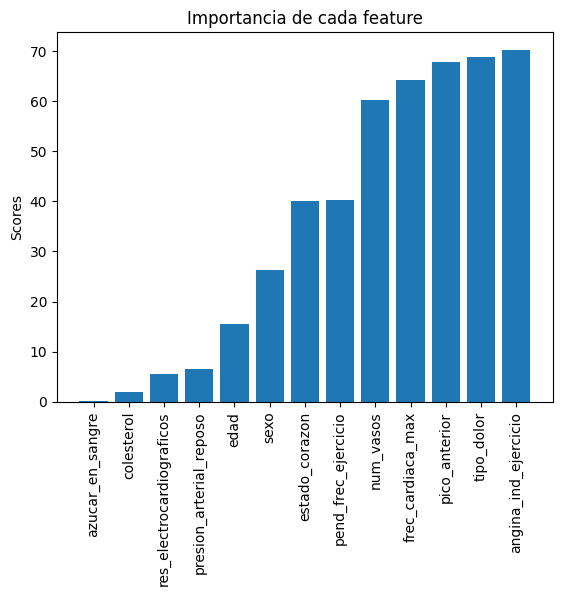

In [76]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=11)
selector.fit(X,Y)

scores = selector.scores_

sorted_indices = np.argsort(scores)

plt.bar(np.arange(len(X.columns)), scores[sorted_indices])
plt.xticks(np.arange(len(X.columns)), X.columns[sorted_indices], rotation=90)
plt.ylabel('Scores')
plt.title('Importancia de cada feature')

mask = selector.get_support()

selected_features = X.columns[mask]

print("Varibles Seleccionadas:", selected_features)

### Seleccion de columnas (features)
*   En base a la explicacion de la variable objetivo segun las features, podriasmo seleccionar:
    *   'angina_ind_ejercicio'
    *   'tipo_dolor'
    *   'pico_anterior'
    *   'frec_cardiaca_max'
    *   'num_vasos'
    *   'pend_frec_ejercicio'
    *   'estado_corazon'
    *   'sexo'
    *   'edad'
    *   'presion_arterial_reposo'
    *   'res_electrocardiograficos'

In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
# Dividir el dataset en entrenamiento y prueba
X_sel = X.loc[:,['angina_ind_ejercicio','tipo_dolor','pico_anterior','frec_cardiaca_max','num_vasos','pend_frec_ejercicio','estado_corazon','sexo','edad','presion_arterial_reposo','res_electrocardiograficos']]
Y_sel = Y
X_train, X_test, Y_train, Y_test = train_test_split(X_sel, Y_sel, test_size=0.3, random_state=50)

In [87]:
# Estandarización (media 0, desviación estándar 1)
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()

X_train_standard = scaler_standard.fit_transform(X_train)

X_test_standard = scaler_standard.transform(X_test)


print("Primeras filas de X_train estandarizado:")

pd.DataFrame(X_train_standard, columns=X_sel.columns).head()

Primeras filas de X_train estandarizado:


,angina_ind_ejercicio,tipo_dolor,pico_anterior,frec_cardiaca_max,num_vasos,pend_frec_ejercicio,estado_corazon,sexo,edad,presion_arterial_reposo,res_electrocardiograficos
0,-0.742611,-0.900003,-0.908569,1.474811,-0.741399,0.999226,-0.536682,0.682113,0.438836,0.423941,-0.943080
1,-0.742611,0.063960,-0.908569,-0.249574,-0.741399,0.999226,-0.536682,0.682113,1.625943,1.490250,-0.943080
2,-0.742611,1.027922,0.044340,-1.443378,-0.741399,-0.660905,-0.536682,-1.466033,2.273456,0.542420,2.847203
3,1.346601,-0.900003,1.776903,0.281006,-0.741399,-2.321037,1.128611,0.682113,-0.208677,0.542420,-0.943080
4,1.346601,-0.900003,-0.908569,0.590511,0.218326,0.999226,1.128611,0.682113,0.438836,0.542420,0.952062


In [ ]:
"""# Escalado robusto 
from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()

X_train_robust = scaler_robust.fit_transform(X_train)

X_test_robust = scaler_robust.transform(X_test)


print("\nPrimeras filas de X_train escalado con RobustScaler:")

pd.DataFrame(X_train_robust, columns=X_sel.columns).head()
"""


Primeras filas de X_train escalado con RobustScaler:


,angina_ind_ejercicio,tipo_dolor,pico_anterior,frec_cardiaca_max,num_vasos,pend_frec_ejercicio,estado_corazon,sexo,edad,presion_arterial_reposo,res_electrocardiograficos
0,0.0,-0.5,-0.333333,0.93750,0.0,1.0,0.0,0.0,0.142857,0.4,0.0
1,0.0,0.0,-0.333333,-0.28125,0.0,1.0,0.0,0.0,0.928571,1.3,0.0
2,0.0,0.5,0.277778,-1.12500,0.0,0.0,0.0,-1.0,1.357143,0.5,2.0
3,1.0,-0.5,1.388889,0.09375,0.0,-1.0,1.0,0.0,-0.285714,0.5,0.0
4,1.0,-0.5,-0.333333,0.31250,1.0,1.0,1.0,0.0,0.142857,0.5,1.0


Text(0.5, 1.0, 'Importancia de cada feature')

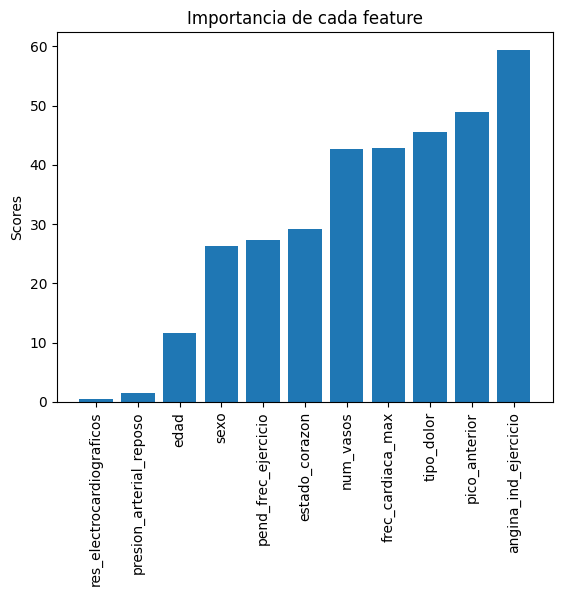

In [88]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=11)
selector.fit(X_train,Y_train)
SelectKBest(k=11)
scores = selector.scores_

sorted_indices = np.argsort(scores)

plt.bar(np.arange(len(X_train.columns)), scores[sorted_indices])
plt.xticks(np.arange(len(X_train.columns)), X_train.columns[sorted_indices], rotation=90)
plt.ylabel('Scores')
plt.title('Importancia de cada feature')

####

In [89]:
Y_sel.value_counts()

propenso
1           164
0           138
Name: count, dtype: int64

---
# Modeling (Modeling)
---

---
# Evaluacion (Evaluation)
---

---
# Deployment (Despliegue)
---